In [70]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import random
import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pylab as plt

import glob
from glob import glob
import nibabel as nb

In [71]:
if torch.cuda.is_available():
    print("The code will run on GPU.")
else:
    print("The code will run on CPU. Go to Edit->Notebook Settings and choose GPU as the hardware accelerator")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.manual_seed_all(42)

The code will run on GPU.


In [72]:
def save_models(G_A2B, G_B2A, D_A, D_B, name):

  torch.save(G_A2B, name+"_G_A2B.pt")
  torch.save(G_B2A,  name+"_G_B2A.pt")
  torch.save(D_A,  name+"_D_A.pt")
  torch.save(D_B, name+"_D_B.pt")

def load_models( name):
  G_A2B=torch.load(name+'_G_A2B.pt', map_location=torch.device('cpu'))
  G_B2A=torch.load(name+"_G_B2A.pt",map_location=torch.device('cpu'))
  D_A=torch.load(name+"_D_A.pt", map_location=torch.device('cpu'))
  D_B=torch.load(name+"_D_B.pt", map_location=torch.device('cpu'))
  return G_A2B, G_B2A, D_A, D_B

In [73]:
from ResnetGenerator import ResnetGenerator
from NLayerDiscriminator import NLayerDiscriminator

def LSGAN_D(real, fake):
  return (torch.mean((real - 1)**2) + torch.mean(fake**2))

def LSGAN_G(fake):
  return  torch.mean((fake - 1)**2)

criterion_Im = torch.nn.L1Loss() 

In [74]:

from ResnetGenerator import ResnetGenerator
from ResnetGeneratorCopy import ResnetGeneratorReLU
from NLayerDiscriminatorCopy import NLayerDiscriminatorReLU
from ResnetGeneratorCopy import ResnetGeneratorLeaky
from NLayerDiscriminatorCopy import NLayerDiscriminatorLeaky
from NLayerDiscriminator import NLayerDiscriminator
from ResnetGeneratorCopy import ResnetGeneratorMish
from NLayerDiscriminatorCopy import NLayerDiscriminatorMish
from ResnetGeneratorCopy import ResnetGeneratorSigmoid
from NLayerDiscriminatorCopy import NLayerDiscriminatorSigmoid


def LSGAN_D(real, fake):
  return (torch.mean((real - 1)**2) + torch.mean(fake**2))

def LSGAN_G(fake):
  return  torch.mean((fake - 1)**2)

criterion_Im = torch.nn.L1Loss() 

In [218]:
# choose models to evaluate - generator downsampling
name = ["4gener00","4gener10","4resnet90","4gener30","4gener40"]


In [ ]:
# choose models to evaluate - activation function
name = ["4bs1_lr-4Sigmoid","4bs1_lr-4ReLU","4bs1_lr-4Original","4bs1_lr-4_Leaky","4bs1_lr-4_Mish"]


In [75]:
%matplotlib inline

In [76]:
# getting all the validation images
test_mris = []
test_soss = []
ns = []
for j in range(10,290):
    test_mris.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\A\mri_img'+str(j)+'.png'))
    img_sos=plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\B\sos_img'+str(j)+'.png')
    img_sos_normalized = (img_sos - np.min(img_sos)) / (np.max(img_sos) - np.min(img_sos))
    test_soss.append(img_sos_normalized)
for j in range(320,375):
    test_mris.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\A\mri_img'+str(j)+'.png'))
    test_soss.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\B\sos_img'+str(j)+'.png'))
for j in range(400,455):
    test_mris.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\A\mri_img'+str(j)+'.png'))
    test_soss.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\B\sos_img'+str(j)+'.png'))
for j in range(480,496):
    test_mris.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\A\mri_img'+str(j)+'.png'))
    test_soss.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\B\sos_img'+str(j)+'.png'))
for j in range(500,506):
    test_mris.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\A\mri_img'+str(j)+'.png'))
    test_soss.append(plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\same_patch_dataset\validation\B\sos_img'+str(j)+'.png'))

In [87]:
import os
# getting all the validation images
test_mris = []
test_soss = []
ns = []
path = r"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\mri2sos_dataset\test"
for filename in os.listdir(path+'\A'):
    if filename.endswith('.png'):
        test_mris.append(plt.imread(path+'\\A\\'+filename))
for filename in os.listdir(path+r'\B'):
    if filename.endswith('.png'):
        test_soss.append(plt.imread(path+'\\B\\'+filename))


In [81]:
# validation loss
# one line printed for each model with avg and std generator and discriminator loss (std within the group)
#name =['0resnet50', '1resnet50', '2resnet50', '3resnet50', '4resnet50','0resnet51', '1resnet51', '2resnet51', '3resnet51', '4resnet51','0resnet52', '1resnet52', '2resnet52', '3resnet52', '4resnet52','0resnet53', '1resnet53', '2resnet53', '3resnet53', '4resnet53']
#name =[ '0resnet92', '1resnet92', '2resnet92', '3resnet92', '4resnet92', '0resnet93', '1resnet93', '2resnet93', '3resnet93', '4resnet93']
name=['lr1_11040','lr1_11041','lr1_11042','lr1_11043','lr1_11044','2lr1_11040','2lr1_11041','2lr1_11042','2lr1_11043','2lr1_11044','3lr1_11040','3lr1_11041','3lr1_11042','3lr1_11043','3lr1_11044']
for k in range(len(name)):
    G_A2B, G_B2A, D_A, D_B = load_models(name[k])
    G_A2B.to(device)
    G_B2A.to(device)
    D_A.to(device)
    D_B.to(device)
    G_losses = []
    D_losses = []
    for i in range(len(test_mris)):
        D_loss = 0
        real_mri = torch.Tensor(test_mris[i]).unsqueeze(0).unsqueeze(0)
        fake_sos = G_A2B(real_mri.to(device))
        rec_mri = G_B2A(fake_sos)

        real_sos = torch.Tensor(test_soss[i]).unsqueeze(0).unsqueeze(0)
        fake_mri = G_B2A(real_sos.to(device))
        rec_sos = G_A2B(fake_mri)

        Disc_loss_A = LSGAN_D(D_A(real_mri.to(device)), D_A(fake_mri.detach()))
        D_loss += Disc_loss_A.item()
        # Discriminator B
        Disc_loss_B =  LSGAN_D(D_B(real_sos.to(device)), D_B(fake_sos.detach()))
        D_loss += Disc_loss_B.item()
        D_losses.append(D_loss) 

                    # Generator
                    # CALCULATE GENERATORS LOSSES
        Fool_disc_loss_A2B = LSGAN_G(D_B(fake_sos))
        Fool_disc_loss_B2A = LSGAN_G(D_A(fake_mri))

                    # Cycle Consistency    both use the two generators
        Cycle_loss_A = criterion_Im(rec_mri, real_mri.to(device))*5
        Cycle_loss_B = criterion_Im(rec_sos, real_sos.to(device))*5

                    # Identity loss
        Id_loss_B2A = criterion_Im(G_B2A(real_mri.to(device)), real_mri.to(device))*10
        Id_loss_A2B = criterion_Im(G_A2B(real_sos.to(device)), real_sos.to(device))*10

                    # generator losses
        Loss_G = Fool_disc_loss_A2B+Fool_disc_loss_B2A+Cycle_loss_A+Cycle_loss_B+Id_loss_B2A+Id_loss_A2B

        G_losses.append(Loss_G.detach().cpu().numpy())

        with torch.no_grad():
            real_mri.detach().cpu()
            real_sos.detach().cpu()
    avg_gen_loss = np.mean(G_losses)
    avg_disc_loss = np.mean(D_losses)
    std_gen_loss = np.std(G_losses)
    std_disc_loss = np.std(D_losses)
    print('avg_gen_loss: %.4f\tstd_gen_loss: %.4f\tavg_disc_loss: %.4f\tstd_disc_loss: %.4f'
                                    % ( avg_gen_loss,std_gen_loss,avg_disc_loss,std_disc_loss))

avg_gen_loss: 2.0060	std_gen_loss: 0.3368	avg_disc_loss: 0.8880	std_disc_loss: 0.0842
avg_gen_loss: 1.8911	std_gen_loss: 0.3993	avg_disc_loss: 1.0488	std_disc_loss: 0.1620
avg_gen_loss: 1.8131	std_gen_loss: 0.4109	avg_disc_loss: 0.8596	std_disc_loss: 0.1410
avg_gen_loss: 2.0010	std_gen_loss: 0.3406	avg_disc_loss: 1.0460	std_disc_loss: 0.1645
avg_gen_loss: 1.7578	std_gen_loss: 0.3082	avg_disc_loss: 1.0079	std_disc_loss: 0.1481
avg_gen_loss: 1.9434	std_gen_loss: 0.4325	avg_disc_loss: 0.9835	std_disc_loss: 0.0764
avg_gen_loss: 2.0480	std_gen_loss: 0.3483	avg_disc_loss: 1.0294	std_disc_loss: 0.1142
avg_gen_loss: 1.7940	std_gen_loss: 0.3861	avg_disc_loss: 1.0203	std_disc_loss: 0.0768
avg_gen_loss: 1.7637	std_gen_loss: 0.4023	avg_disc_loss: 0.9747	std_disc_loss: 0.0711
avg_gen_loss: 1.9485	std_gen_loss: 0.4467	avg_disc_loss: 1.0323	std_disc_loss: 0.0853
avg_gen_loss: 2.0798	std_gen_loss: 0.5634	avg_disc_loss: 0.9559	std_disc_loss: 0.0655
avg_gen_loss: 1.7360	std_gen_loss: 0.4047	avg_disc_los

In [65]:
def average(lst):
    return sum(lst) / len(lst)

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
from skimage.metrics import structural_similarity as ssim
def PSNR(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR has no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr
import sklearn.metrics as metrics

In [68]:
import os
# getting all the validation images
test_mris = []
test_soss = []
ns = []
path = r"C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\mri2sos_dataset\test"
for filename in os.listdir(path+'\A'):
    if filename.endswith('.png'):
        test_mris.append(plt.imread(path+'\\A\\'+filename))
for filename in os.listdir(path+r'\B'):
    if filename.endswith('.png'):
        test_soss.append(plt.imread(path+'\\B\\'+filename))

In [88]:
# print evaluation metrics for each model in the name list
#name = ["4gener00","4gener10","4resnet90","4gener30","4gener40","4gener01","4gener11","4resnet91","4gener31","4gener41","4gener02","4gener12","4resnet92","4gener32","4gener42"]
name = ["4bs1_lr-4_Sigmoid","4bs1_lr-4_ReLU","4bs1_lr-4_Original","4bs1_lr-4_Leaky","4bs1_lr-4_Mish"]
for k in range(len(name)):
    test_fake_mris = []
    test_fake_soss = []
    test_rec_mris = []
    test_rec_soss = []
    G_A2B, G_B2A, D_A, D_B = load_models(name[k])
    G_A2B.to(device)
    G_B2A.to(device)
    D_A.to(device)
    D_B.to(device)
    for i in range(len(test_mris)):
        real_mri = torch.Tensor(test_mris[i]).unsqueeze(0).unsqueeze(0)
        fake_sos = G_A2B(real_mri.to(device)).cpu().detach().numpy()
        rec_mri = G_B2A(torch.Tensor(fake_sos).to(device)).cpu().detach().numpy()

        real_sos = torch.Tensor(test_soss[i]).unsqueeze(0).unsqueeze(0)
        fake_mri = G_B2A(real_sos.to(device)).cpu().detach().numpy()
        rec_sos = G_A2B(torch.Tensor(fake_mri).to(device)).cpu().detach().numpy()

        test_fake_mris.append(fake_mri)
        test_fake_soss.append(fake_sos)
        test_rec_mris.append(rec_mri)
        test_rec_soss.append(rec_sos)

        with torch.no_grad():
            real_mri.detach().cpu()
            real_sos.detach().cpu()  
    mri_mses = []
    sos_mses = []
    for i in range(len(test_mris)):
        mri_mses.append(mse(test_mris[i], test_fake_mris[i][0,0,:,:]))
        sos_mses.append(mse(test_soss[i], test_fake_soss[i][0,0,:,:]))

    
    mri_ssim = []
    sos_ssim = []
    rec_mri_ssim = []
    rec_sos_ssim = []
    for i in range(len(test_mris)):
            mri_ssim.append(ssim(test_mris[i], test_fake_mris[i][0,0,:,:]))
            sos_ssim.append(ssim(test_soss[i], test_fake_soss[i][0,0,:,:]))
            rec_mri_ssim.append(ssim(test_mris[i], test_rec_mris[i][0,0,:,:]))
            rec_sos_ssim.append(ssim(test_soss[i], test_rec_soss[i][0,0,:,:]))

    mri_psnr = []
    sos_psnr = []
    rec_mri_psnr = []
    rec_sos_psnr = []
    for i in range(len(test_mris)):
        mri_psnr.append(PSNR(test_mris[i], test_fake_mris[i][0,0,:,:]))
        sos_psnr.append(PSNR(test_soss[i], test_fake_soss[i][0,0,:,:]))
        rec_mri_psnr.append(PSNR(test_mris[i], test_rec_mris[i][0,0,:,:]))
        rec_sos_psnr.append(PSNR(test_soss[i], test_rec_soss[i][0,0,:,:]))


    mri_mae = []
    sos_mae = []
    rec_mri_mae = []
    rec_sos_mae = []
    for i in range(len(test_mris)):
        mri_mae.append(metrics.mean_absolute_error(test_mris[i], test_fake_mris[i][0,0,:,:]))
        sos_mae.append(metrics.mean_absolute_error(test_soss[i], test_fake_soss[i][0,0,:,:]))
        rec_mri_mae.append(metrics.mean_absolute_error(test_mris[i], test_rec_mris[i][0,0,:,:]))
        rec_sos_mae.append(metrics.mean_absolute_error(test_soss[i], test_rec_soss[i][0,0,:,:]))
    print(name[k])
    print("Evaluation Metrics")
    print("Recons.................")
    print("MAE: \t MRI: "+str(np.mean(rec_mri_mae)))
    print("\t SoS: "+str(np.mean(rec_sos_mae)))
    #print("MSE: \t MRI: "+str(np.mean(rec_mri_mses)))
    # print("\t SoS: "+str(np.mean(rec_sos_mses)))
    print("PSNR: \t MRI: "+str(np.mean(rec_mri_psnr)))
    print("\t SoS: "+str(np.mean(rec_sos_psnr)))
    print("SSIM: \t MRI: "+str(np.mean(rec_mri_ssim)))
    print("\t SoS: "+str(np.mean(rec_sos_ssim)))
    print("Fakes..................")
    print("MAE: \t MRI: "+str(np.mean(mri_mae)))
    print("\t SoS: "+str(np.mean(sos_mae)))
    print("MSE: \t MRI: "+str(np.mean(mri_mses)))
    print("\t SoS: "+str(np.mean(sos_mses)))
    print("PSNR: \t MRI: "+str(np.mean(mri_psnr)))
    print("\t SoS: "+str(np.mean(sos_psnr)))
    print("SSIM: \t MRI: "+str(np.mean(mri_ssim)))
    print("\t SoS: "+str(np.mean(sos_ssim)))
    print("Fakes Std.Dev..................")
    print("MAE: \t MRI: "+str(np.std(mri_mae)))
    print("\t SoS: "+str(np.std(sos_mae)))
    print("MSE: \t MRI: "+str(np.std(mri_mses)))
    print("\t SoS: "+str(np.std(sos_mses)))
    print("PSNR: \t MRI: "+str(np.std(mri_psnr)))
    print("\t SoS: "+str(np.std(sos_psnr)))
    print("SSIM: \t MRI: "+str(np.std(mri_ssim)))
    print("\t SoS: "+str(np.std(sos_ssim)))
    print("Recons Std.Dev..................")
    print("MAE: \t MRI: "+str(np.std(rec_mri_mae)))
    print("\t SoS: "+str(np.std(rec_sos_mae)))
    print("PSNR: \t MRI: "+str(np.std(rec_mri_psnr)))
    print("\t SoS: "+str(np.std(rec_sos_psnr)))
    print("SSIM: \t MRI: "+str(np.std(rec_mri_ssim)))
    print("\t SoS: "+str(np.std(rec_sos_ssim)))

KeyboardInterrupt: 

C:\Users\Xiaowei\AppData\Local\Temp\ipykernel_11300\1359381254.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,4,4*i+1)


<Figure size 640x480 with 0 Axes>

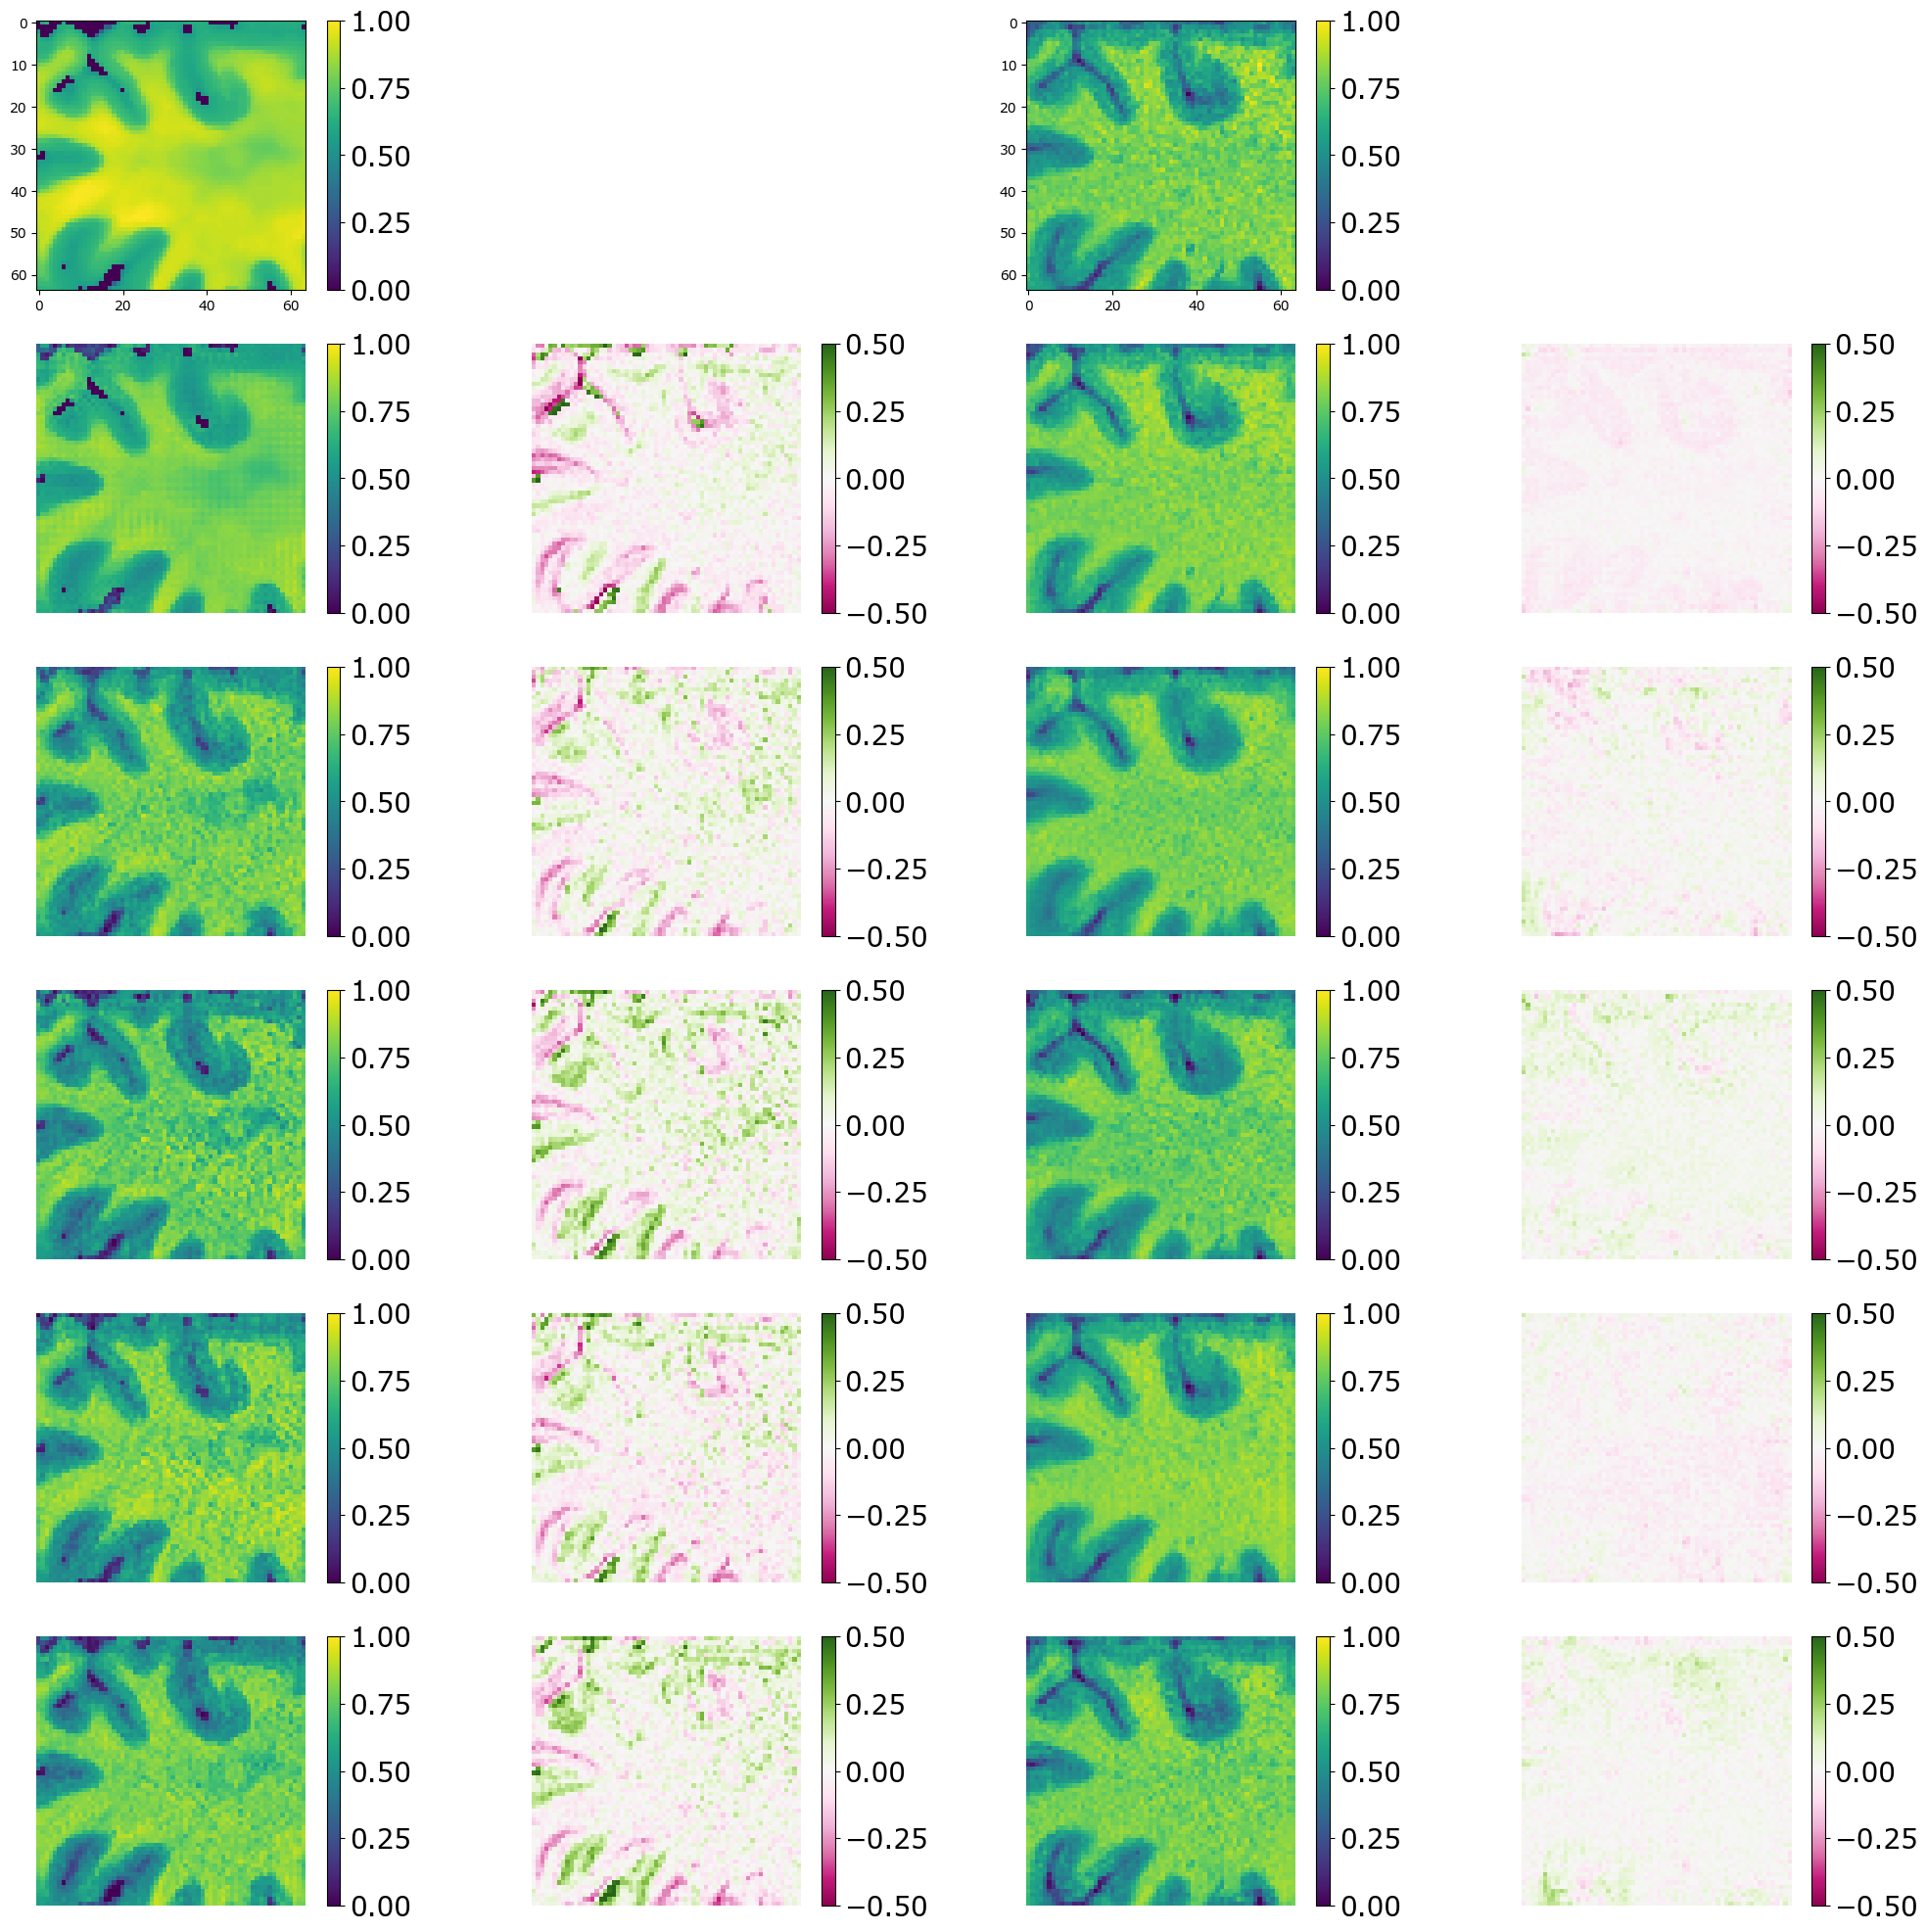

In [90]:
plt.figure()
plt.subplots(6,4, figsize=(25,25))
count = 0
plt.subplot(6,4,1)
plt.imshow(test_soss[160])
plt.colorbar().ax.tick_params(labelsize=20)
plt.clim(0,1);
plt.subplot(6,4,2);plt.axis("off")
plt.subplot(6,4,3)
plt.imshow(test_mris[160])
plt.colorbar().ax.tick_params(labelsize=20)
plt.clim(0,1);
plt.subplot(6,4,4);plt.axis("off")
plt.subplot(6,4,5)
plt.imshow(test_mris[160][30:60,30:60])
plt.colorbar().ax.tick_params(labelsize=20)
plt.clim(0,1);

for i in range(1,6):
    plt.subplot(6,4,4*i+1)
    plt.imshow(test_fake_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0,1);
    #plt.title('Generator '+str(count)+ '\n Fake MRI ', fontsize=20)
    plt.subplot(6,4,4*i+2)
    plt.imshow(test_mris[160]-test_fake_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=20)
    #plt.title('MAE real-fake ', fontsize=20)
    plt.subplot(6,4,4*i+3)
    plt.imshow(test_rec_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0,1);
    #plt.title('Reconstructed MRI', fontsize=20)
    plt.subplot(6,4,4*i+4)
    plt.imshow(test_mris[160]-test_rec_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=20)
    #plt.title('MAE real-recon ', fontsize=20)
    count +=1
plt.savefig('activation.png', dpi=300) 

In [89]:
# get fake mri, rec mri, fake sos, rec sos for a certain image in the dataset for each model in the name list
test_fake_mris = []
test_fake_soss = []
test_rec_mris = []
test_rec_soss = []
#name = ["4gener00","4gener10","4resnet90","4gener30","4gener40"]
#name = ["4resnet00","4resnet50",'4resnet60','4resnet70','4resnet90']
name = ["4bs1_lr-4_Sigmoid","4bs1_lr-4_ReLU","4bs1_lr-4_Original","4bs1_lr-4_Leaky","4bs1_lr-4_Mish"]
for i in range(len(name)):
    G_A2B, G_B2A, D_A, D_B = load_models(name[i])
    G_A2B.to(device)
    G_B2A.to(device)
    D_A.to(device)
    D_B.to(device)

    real_mri = torch.Tensor(test_mris[160]).unsqueeze(0).unsqueeze(0) ## test_mris[choose image]
    fake_sos = G_A2B(real_mri.to(device)).cpu().detach().numpy()
    rec_mri = G_B2A(torch.Tensor(fake_sos).to(device)).cpu().detach().numpy()

    real_sos = torch.Tensor(test_soss[160]).unsqueeze(0).unsqueeze(0) ## test_soss[choose same index as mri]
    fake_mri = G_B2A(real_sos.to(device)).cpu().detach().numpy()
    rec_sos = G_A2B(torch.Tensor(fake_mri).to(device)).cpu().detach().numpy()

    test_fake_mris.append(fake_mri)
    test_fake_soss.append(fake_sos)
    test_rec_mris.append(rec_mri)
    test_rec_soss.append(rec_sos)

    with torch.no_grad():
        real_mri.detach().cpu()
        real_sos.detach().cpu()


    

C:\Users\Xiaowei\AppData\Local\Temp\ipykernel_11300\3104384250.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i)
C:\Users\Xiaowei\AppData\Local\Temp\ipykernel_11300\3104384250.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+5)
C:\Users\Xiaowei\AppData\Local\Temp\ipykernel_11300\3104384250.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+15)


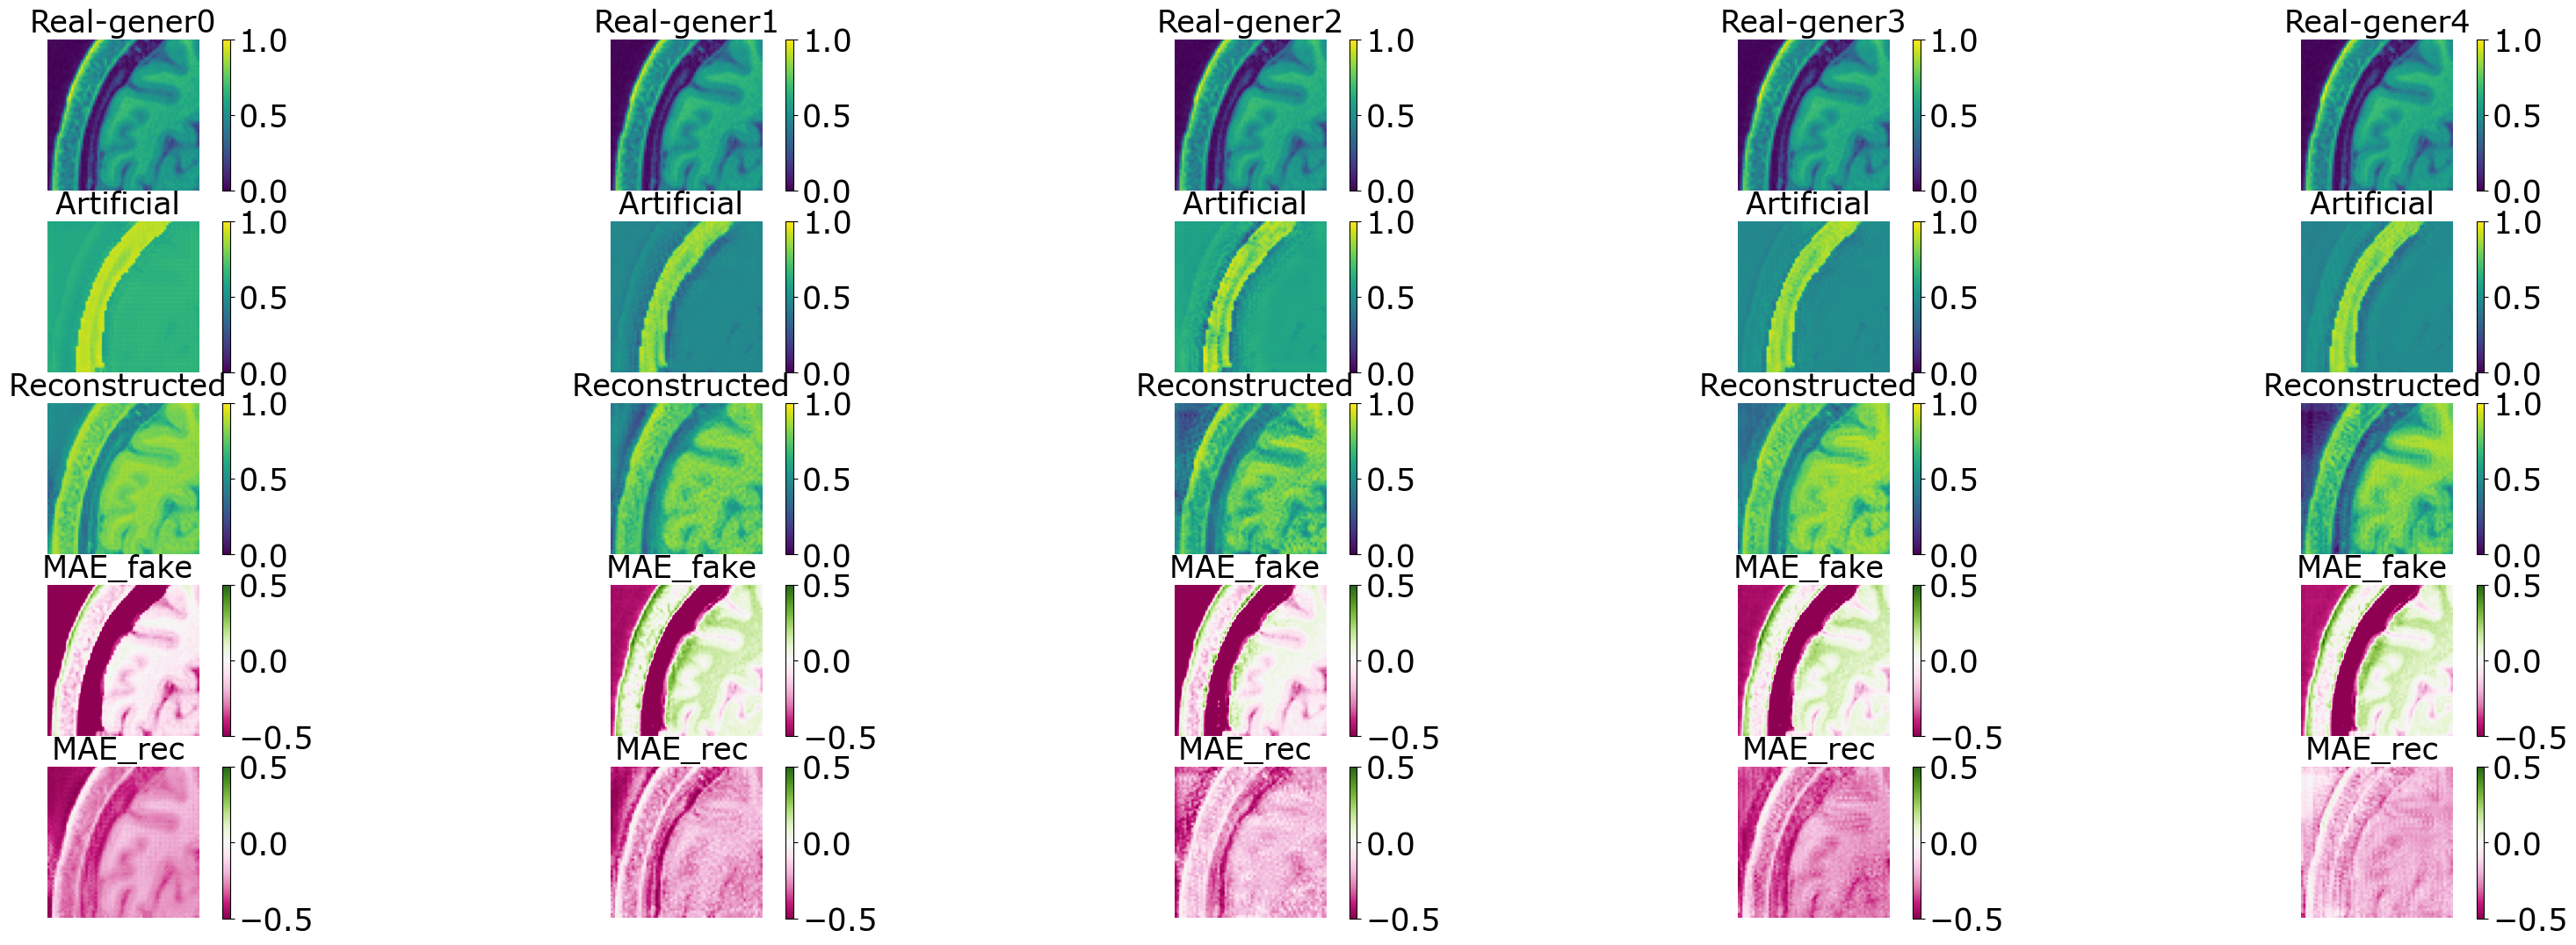

In [34]:
# plot real mri, fake mri, rec mri, MAE on real-fake, MAE on real-rec: each model on one column
plt.subplots(3,5, figsize=(40,13))
count = 0
for i in range(1,6):
    plt.subplot(5,5,i)
    plt.imshow(test_mris[160]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real-gener'+str(count), fontsize=25)
    plt.subplot(5,5,i+5)
    plt.imshow(test_fake_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial ', fontsize=25)
    plt.subplot(5,5,i+10)
    plt.imshow(test_rec_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Reconstructed ', fontsize=25)
    plt.subplot(5,5,i+15)
    plt.imshow(test_mris[160]-test_fake_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_fake ', fontsize=25)
    plt.subplot(5,5,i+20)
    plt.imshow(test_mris[160]-test_rec_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_rec ', fontsize=25)
    count +=1

In [52]:
# get fake mri, rec mri, fake sos, rec sos for a certain image in the dataset for each model in the name list
test_mris = plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\mri2sos_dataset\test\A\mri_img104.png')
test_soss = plt.imread(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\mri2sos_dataset\test\B\sos_img104.png')
test_fake_mris = []
test_fake_soss = []
test_rec_mris = []
test_rec_soss = []
#name = ["4gener00","4gener10","4resnet90","4gener30","4gener40"]
#name = ["4resnet00","4resnet50",'4resnet60','4resnet70','4resnet90']
name = ["4bs1_lr-4_Sigmoid","4bs1_lr-4_ReLU","4bs1_lr-4_Original","4bs1_lr-4_Leaky","4bs1_lr-4_Mish"]
for i in range(len(name)):
    G_A2B, G_B2A, D_A, D_B = load_models(name[i])
    G_A2B.to(device)
    G_B2A.to(device)
    D_A.to(device)
    D_B.to(device)

    real_mri = torch.Tensor(test_mris).unsqueeze(0).unsqueeze(0) ## test_mris[choose image]
    fake_sos = G_A2B(real_mri.to(device)).cpu().detach().numpy()
    rec_mri = G_B2A(torch.Tensor(fake_sos).to(device)).cpu().detach().numpy()

    real_sos = torch.Tensor(test_soss).unsqueeze(0).unsqueeze(0) ## test_soss[choose same index as mri]
    fake_mri = G_B2A(real_sos.to(device)).cpu().detach().numpy()
    rec_sos = G_A2B(torch.Tensor(fake_mri).to(device)).cpu().detach().numpy()

    test_fake_mris.append(fake_mri)
    test_fake_soss.append(fake_sos)
    test_rec_mris.append(rec_mri)
    test_rec_soss.append(rec_sos)

    with torch.no_grad():
        real_mri.detach().cpu()
        real_sos.detach().cpu()


    

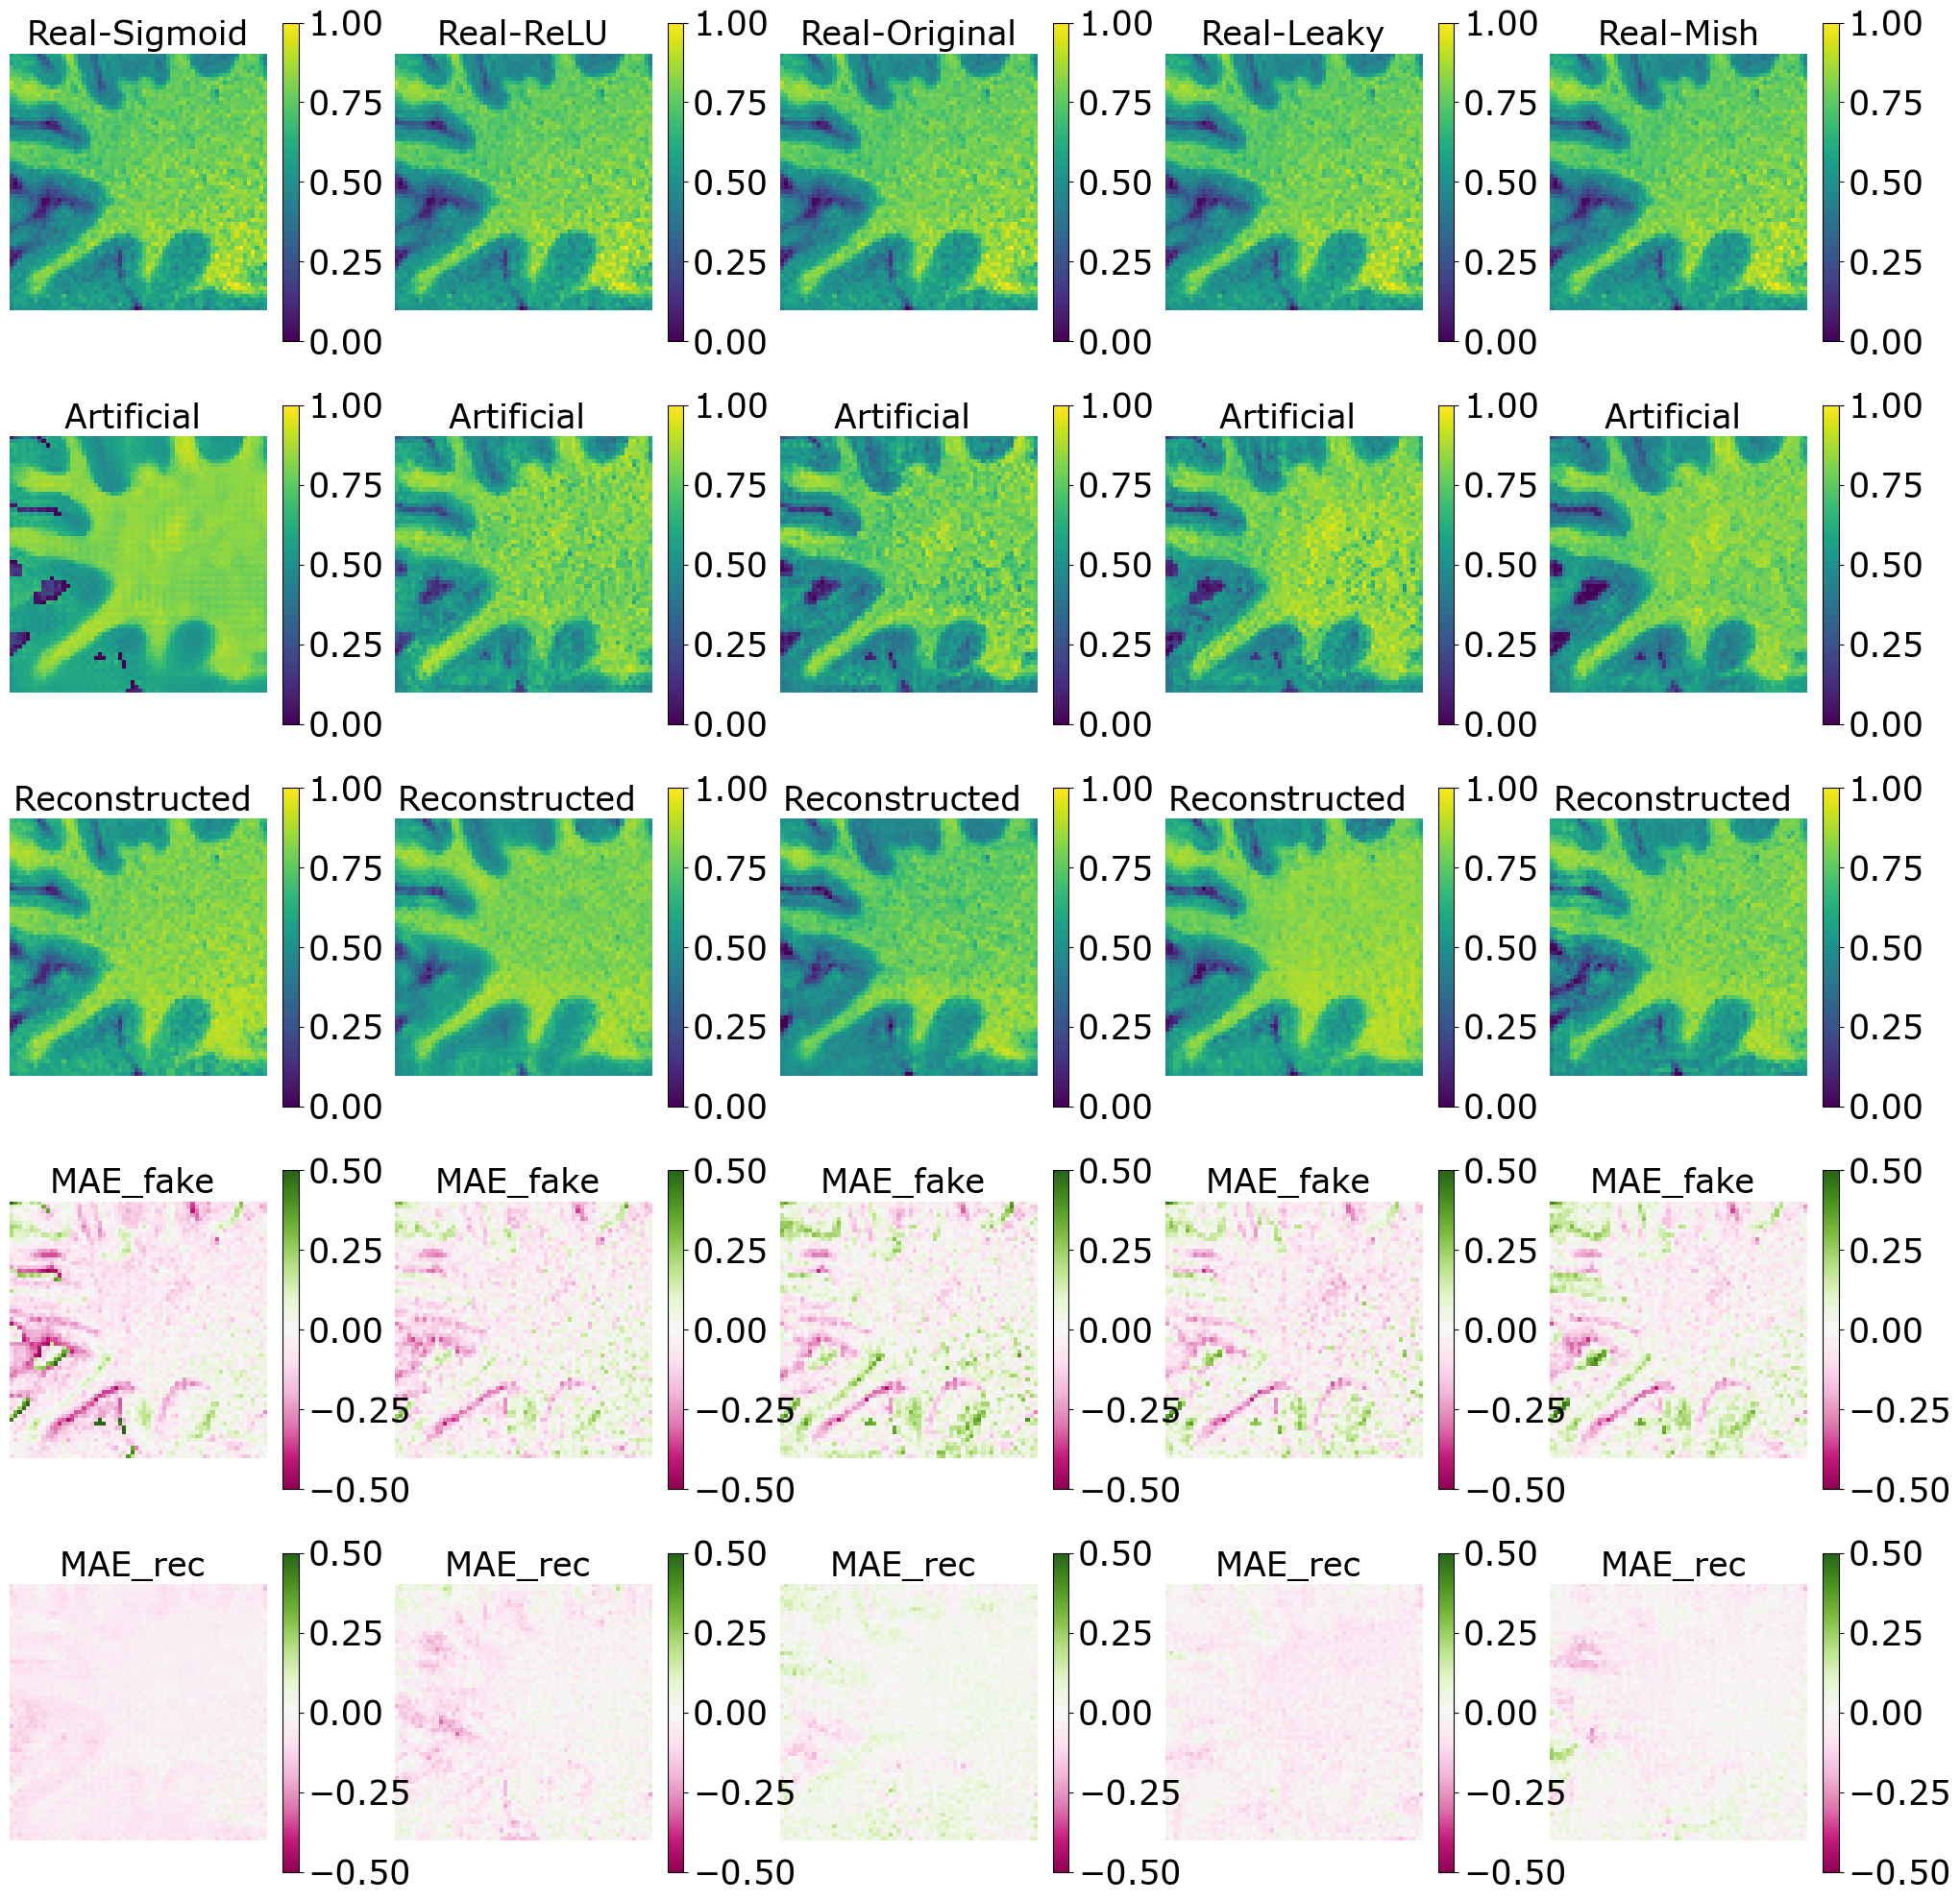

In [53]:
# plot real mri, fake mri, rec mri, MAE on real-fake, MAE on real-rec: each model on one column
plt.subplots(5,5, figsize=(25,25))
count = 0
activ = ["Sigmoid","ReLU","Original","Leaky","Mish"]
for i in range(1,6):
    plt.subplot(5,5,i)
    plt.imshow(test_mris);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real-'+activ[i-1], fontsize=25)
    plt.subplot(5,5,i+5)
    plt.imshow(test_fake_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial ', fontsize=25)
    plt.subplot(5,5,i+10)
    plt.imshow(test_rec_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Reconstructed ', fontsize=25)
    plt.subplot(5,5,i+15)
    plt.imshow(test_mris-test_fake_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_fake ', fontsize=25)
    plt.subplot(5,5,i+20)
    plt.imshow(test_mris-test_rec_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_rec ', fontsize=25)
    count +=1

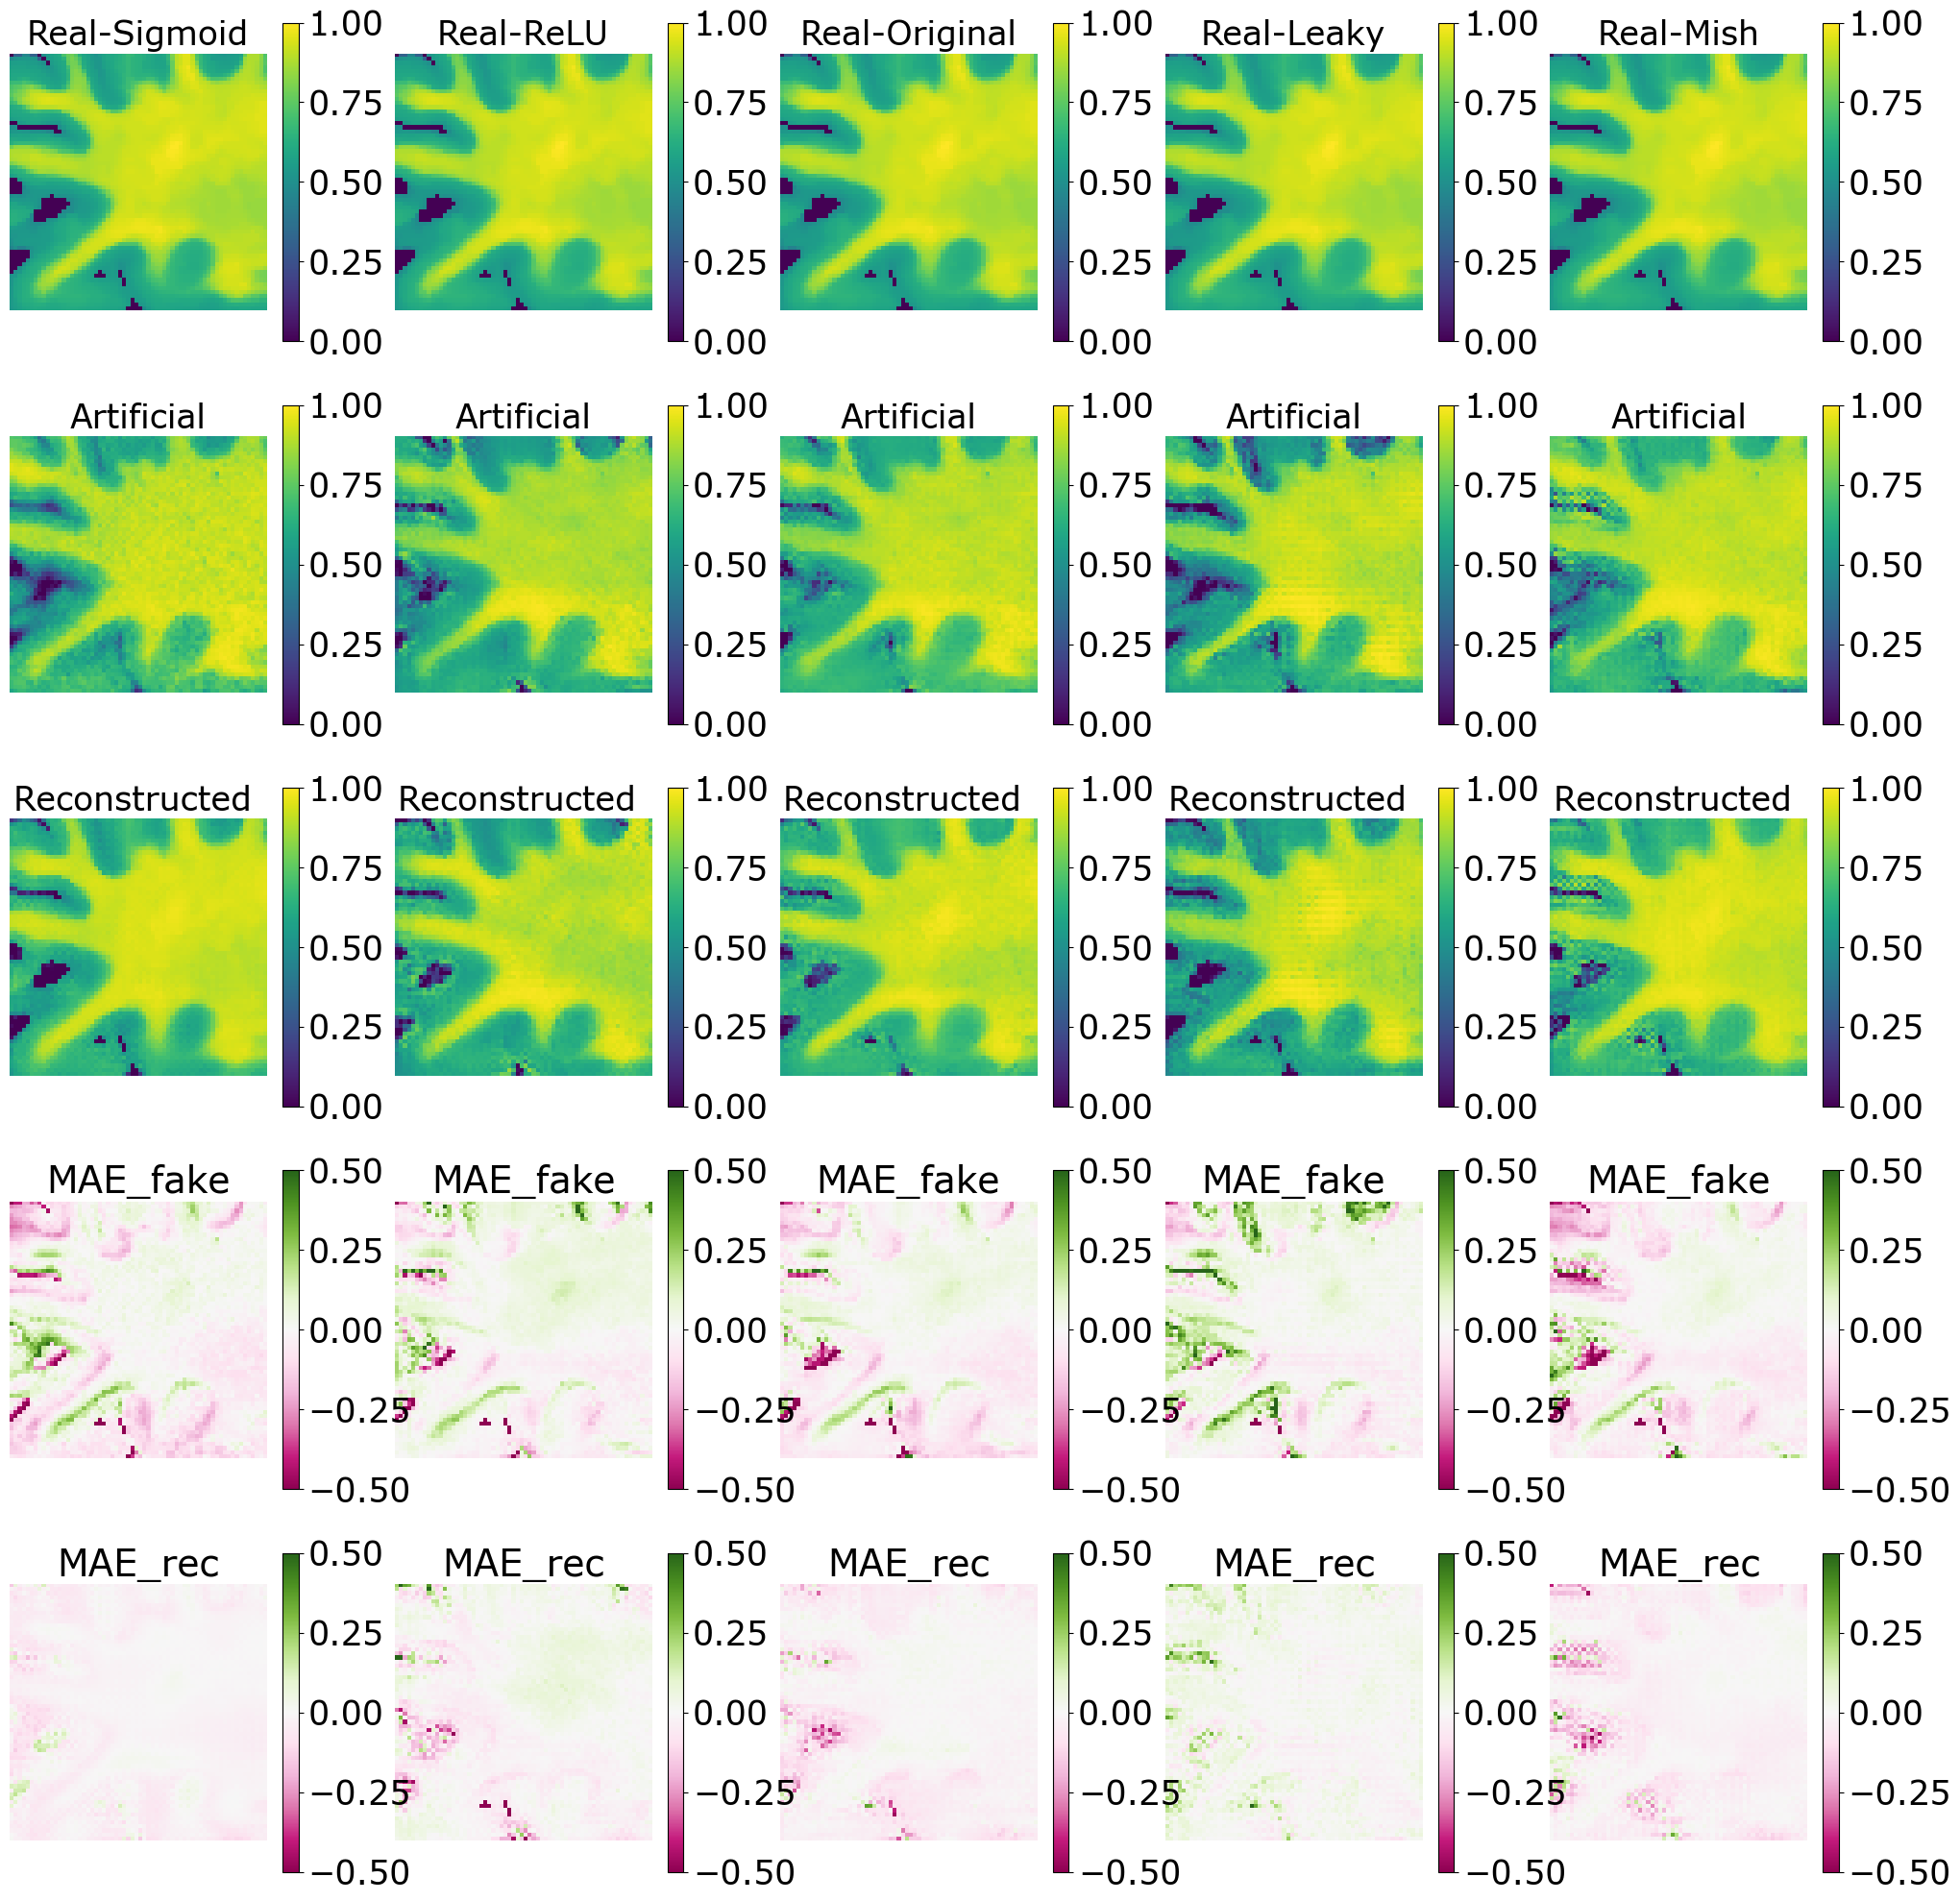

In [38]:
# plot real sos, fake sos, rec sos, MAE on real-fake, MAE on real-rec: each model on one column
plt.subplots(5,5, figsize=(25,25))
count = 0
activ = ["Sigmoid","ReLU","Original","Leaky","Mish"]
for i in range(1,6):
    plt.subplot(5,5,i)
    plt.imshow(test_soss);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real-'+activ[count], fontsize=25)
    plt.subplot(5,5,i+5)
    plt.imshow(test_fake_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial', fontsize=25)
    plt.subplot(5,5,i+10)
    plt.imshow(test_rec_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Reconstructed ', fontsize=25)
    plt.subplot(5,5,i+15)
    plt.imshow(test_soss-test_fake_soss[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_fake', fontsize=28)
    plt.subplot(5,5,i+20)
    plt.imshow(test_soss-test_rec_soss[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_rec', fontsize=28)
    count +=1

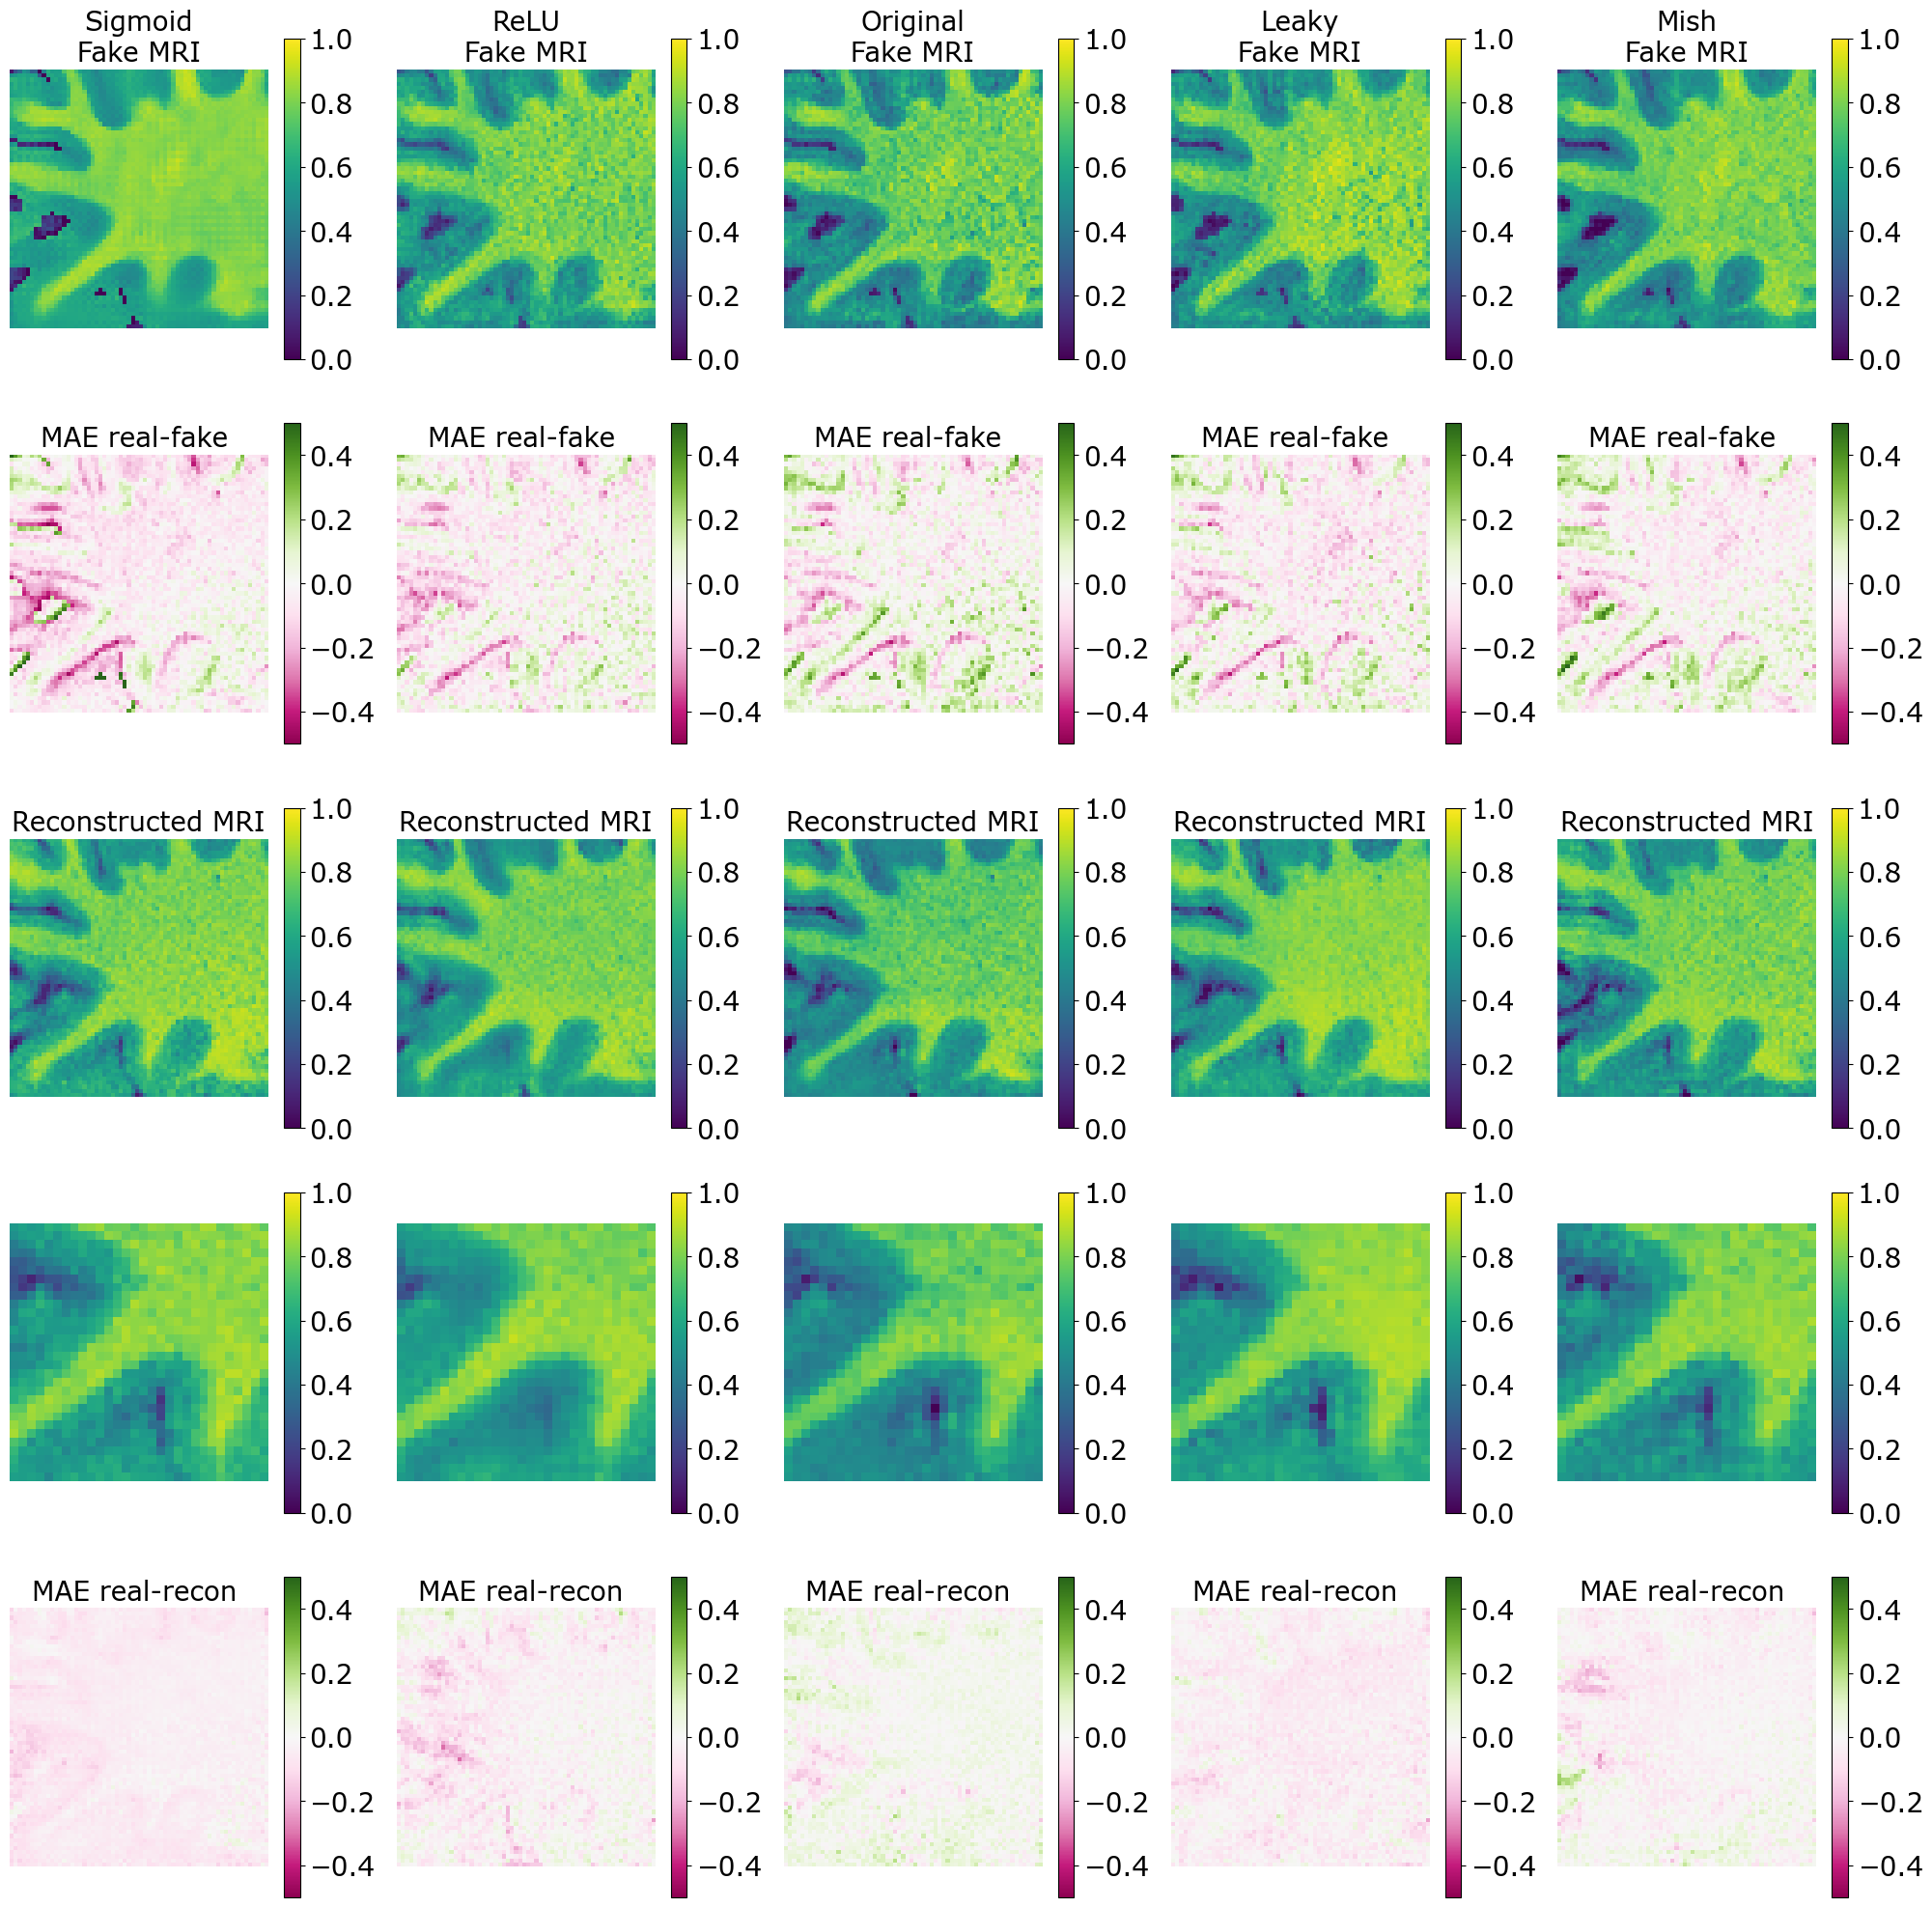

In [60]:
plt.subplots(5,5, figsize=(25,25))
count = 0
activ = ["Sigmoid","ReLU","Original","Leaky","Mish"]
for i in range(1,6):
    plt.subplot(5,5,i)
    plt.imshow(test_fake_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0,1);
    plt.title(activ[count]+ '\n Fake MRI ', fontsize=20)
    plt.subplot(5,5,i+5)
    plt.imshow(test_mris-test_fake_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.title('MAE real-fake ', fontsize=20)
    plt.subplot(5,5,i+10)
    plt.imshow(test_rec_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0,1);
    plt.title('Reconstructed MRI', fontsize=20)
    plt.subplot(5,5,i+15)
    plt.imshow(test_rec_mris[count][0,0,:,:][30:60,10:40]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0, 1);
    plt.subplot(5,5,i+20)
    plt.imshow(test_mris-test_rec_mris[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.title('MAE real-recon ', fontsize=20)
    count +=1

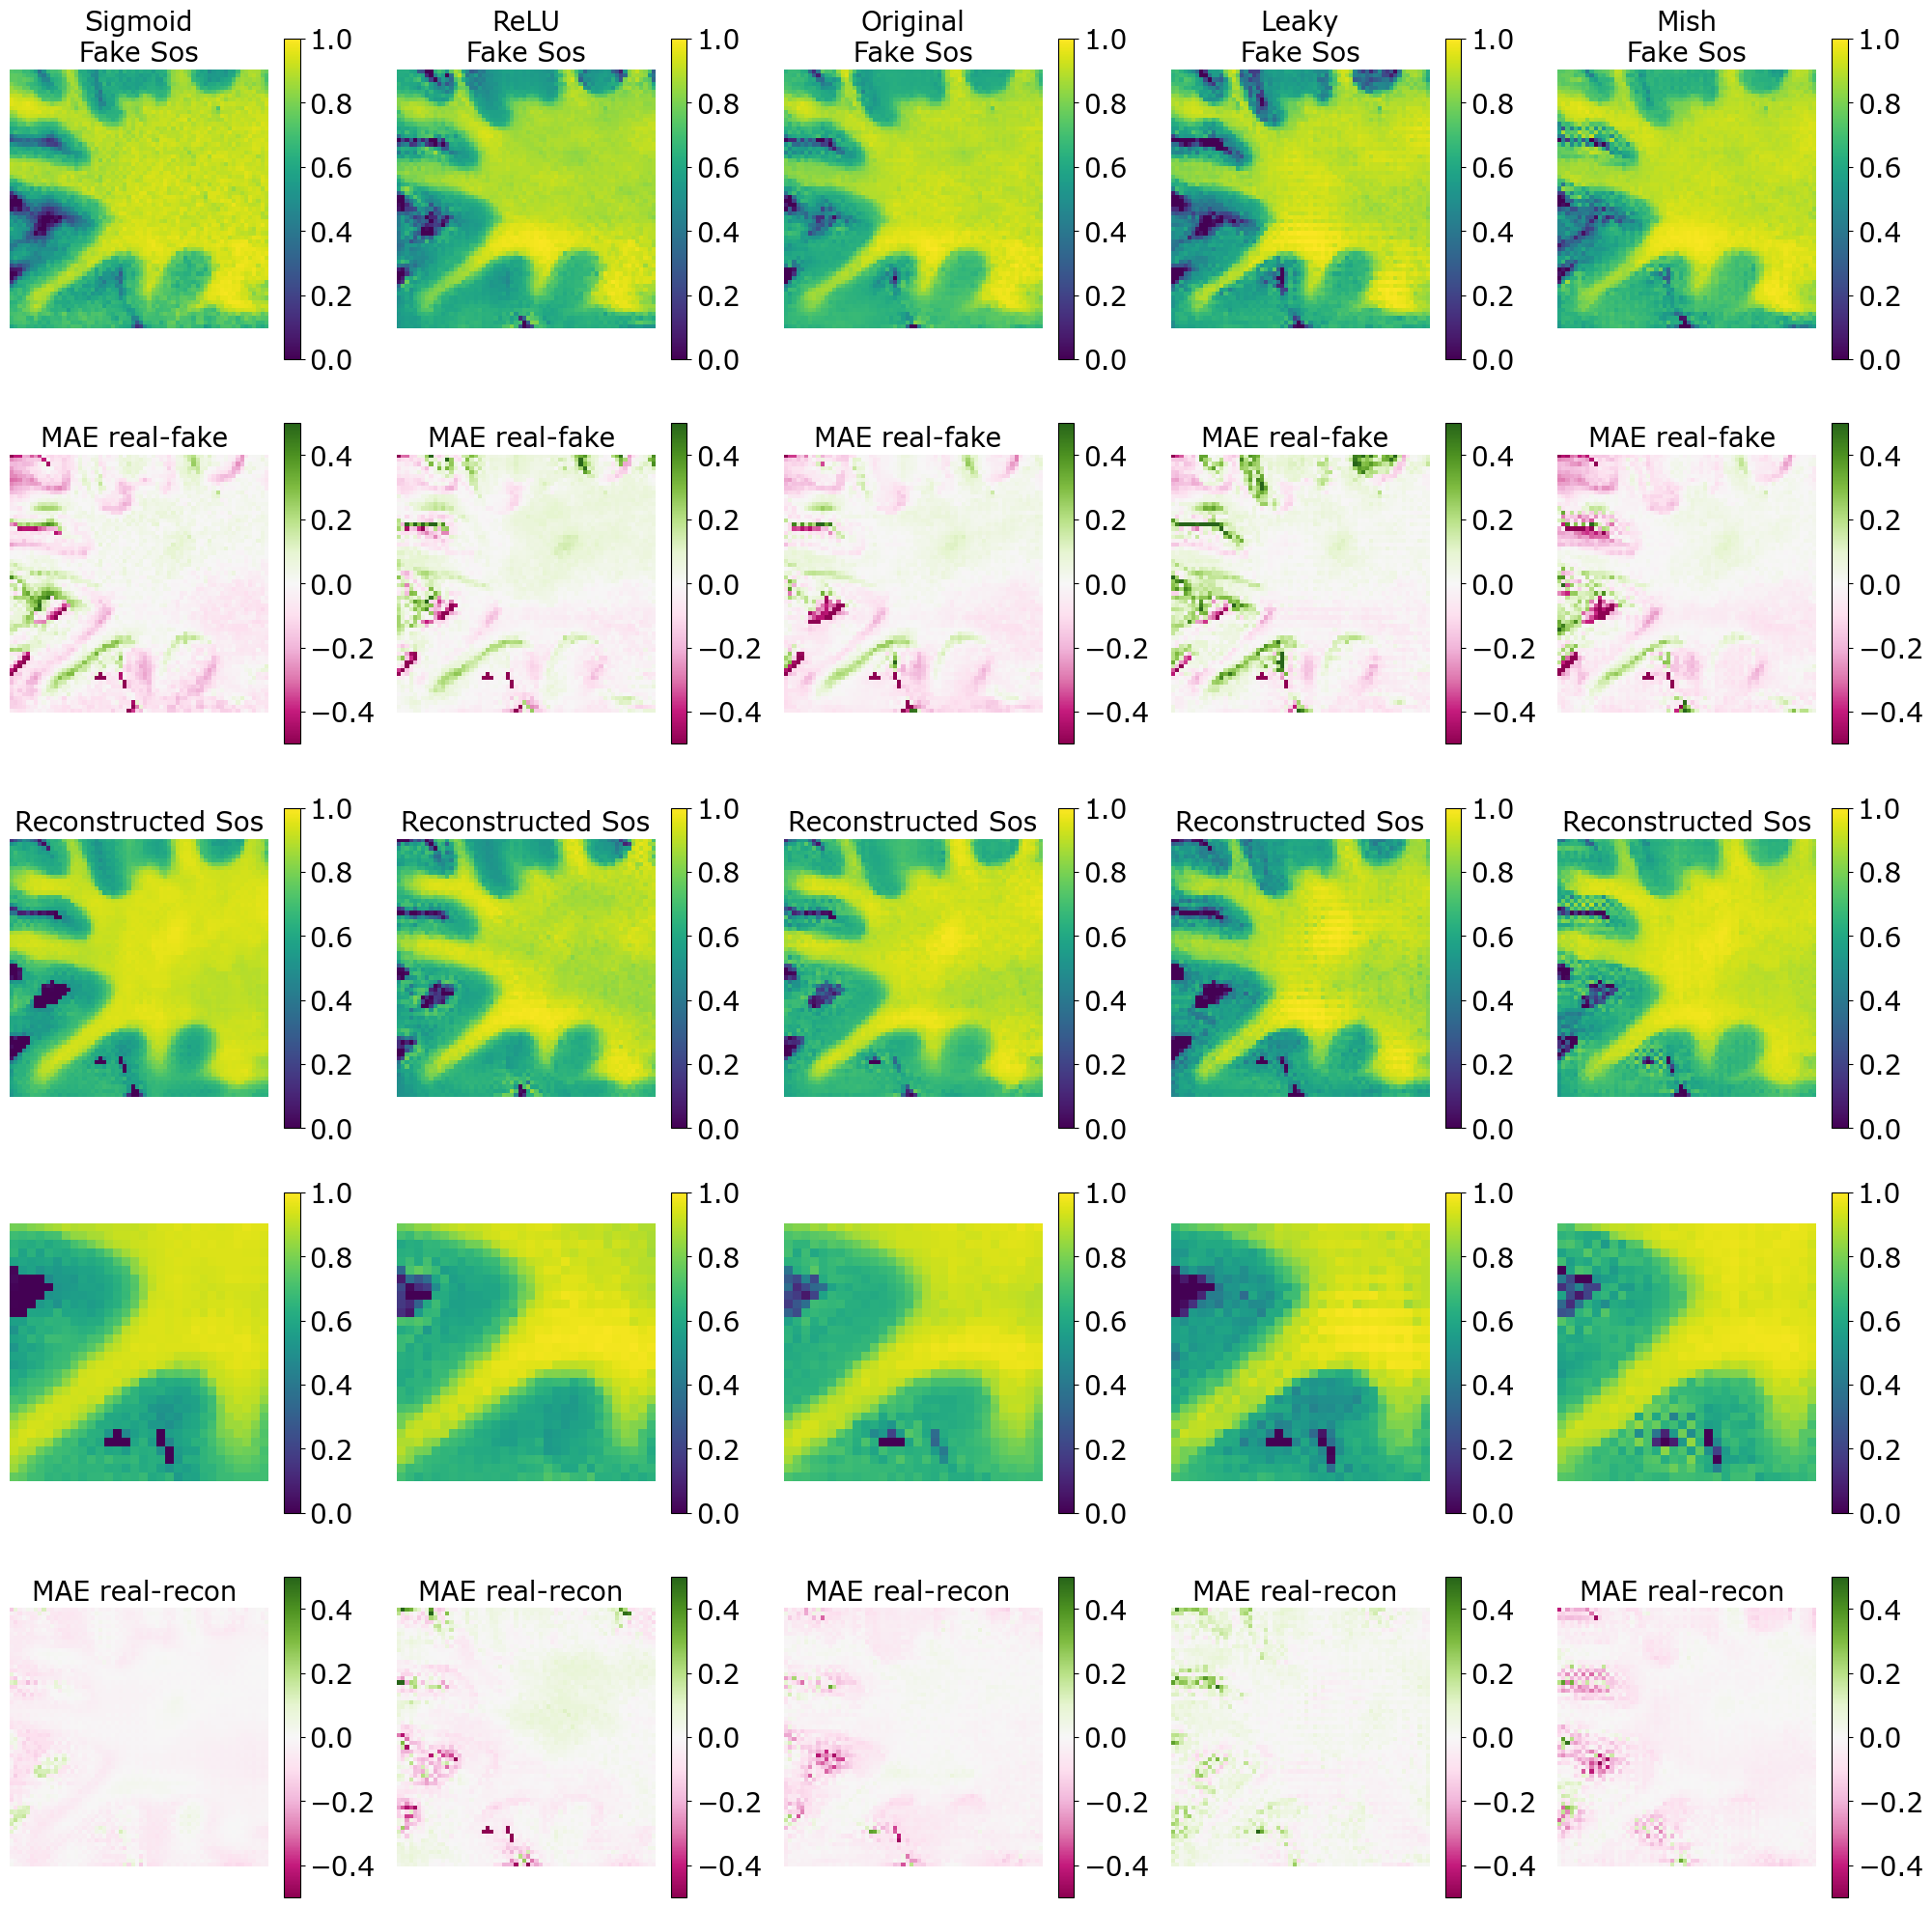

In [61]:
plt.subplots(5,5, figsize=(25,25))
count = 0
activ = ["Sigmoid","ReLU","Original","Leaky","Mish"]
for i in range(1,6):
    plt.subplot(5,5,i)
    plt.imshow(test_fake_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0,1);
    plt.title(activ[count]+ '\n Fake Sos ', fontsize=20)
    plt.subplot(5,5,i+5)
    plt.imshow(test_soss-test_fake_soss[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.title('MAE real-fake ', fontsize=20)
    plt.subplot(5,5,i+10)
    plt.imshow(test_rec_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0,1);
    plt.title('Reconstructed Sos', fontsize=20)
    plt.subplot(5,5,i+15)
    plt.imshow(test_rec_soss[count][0,0,:,:][30:60,10:40]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.clim(0, 1);
    plt.subplot(5,5,i+20)
    plt.imshow(test_soss-test_rec_soss[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=20)
    plt.title('MAE real-recon ', fontsize=20)
    count +=1

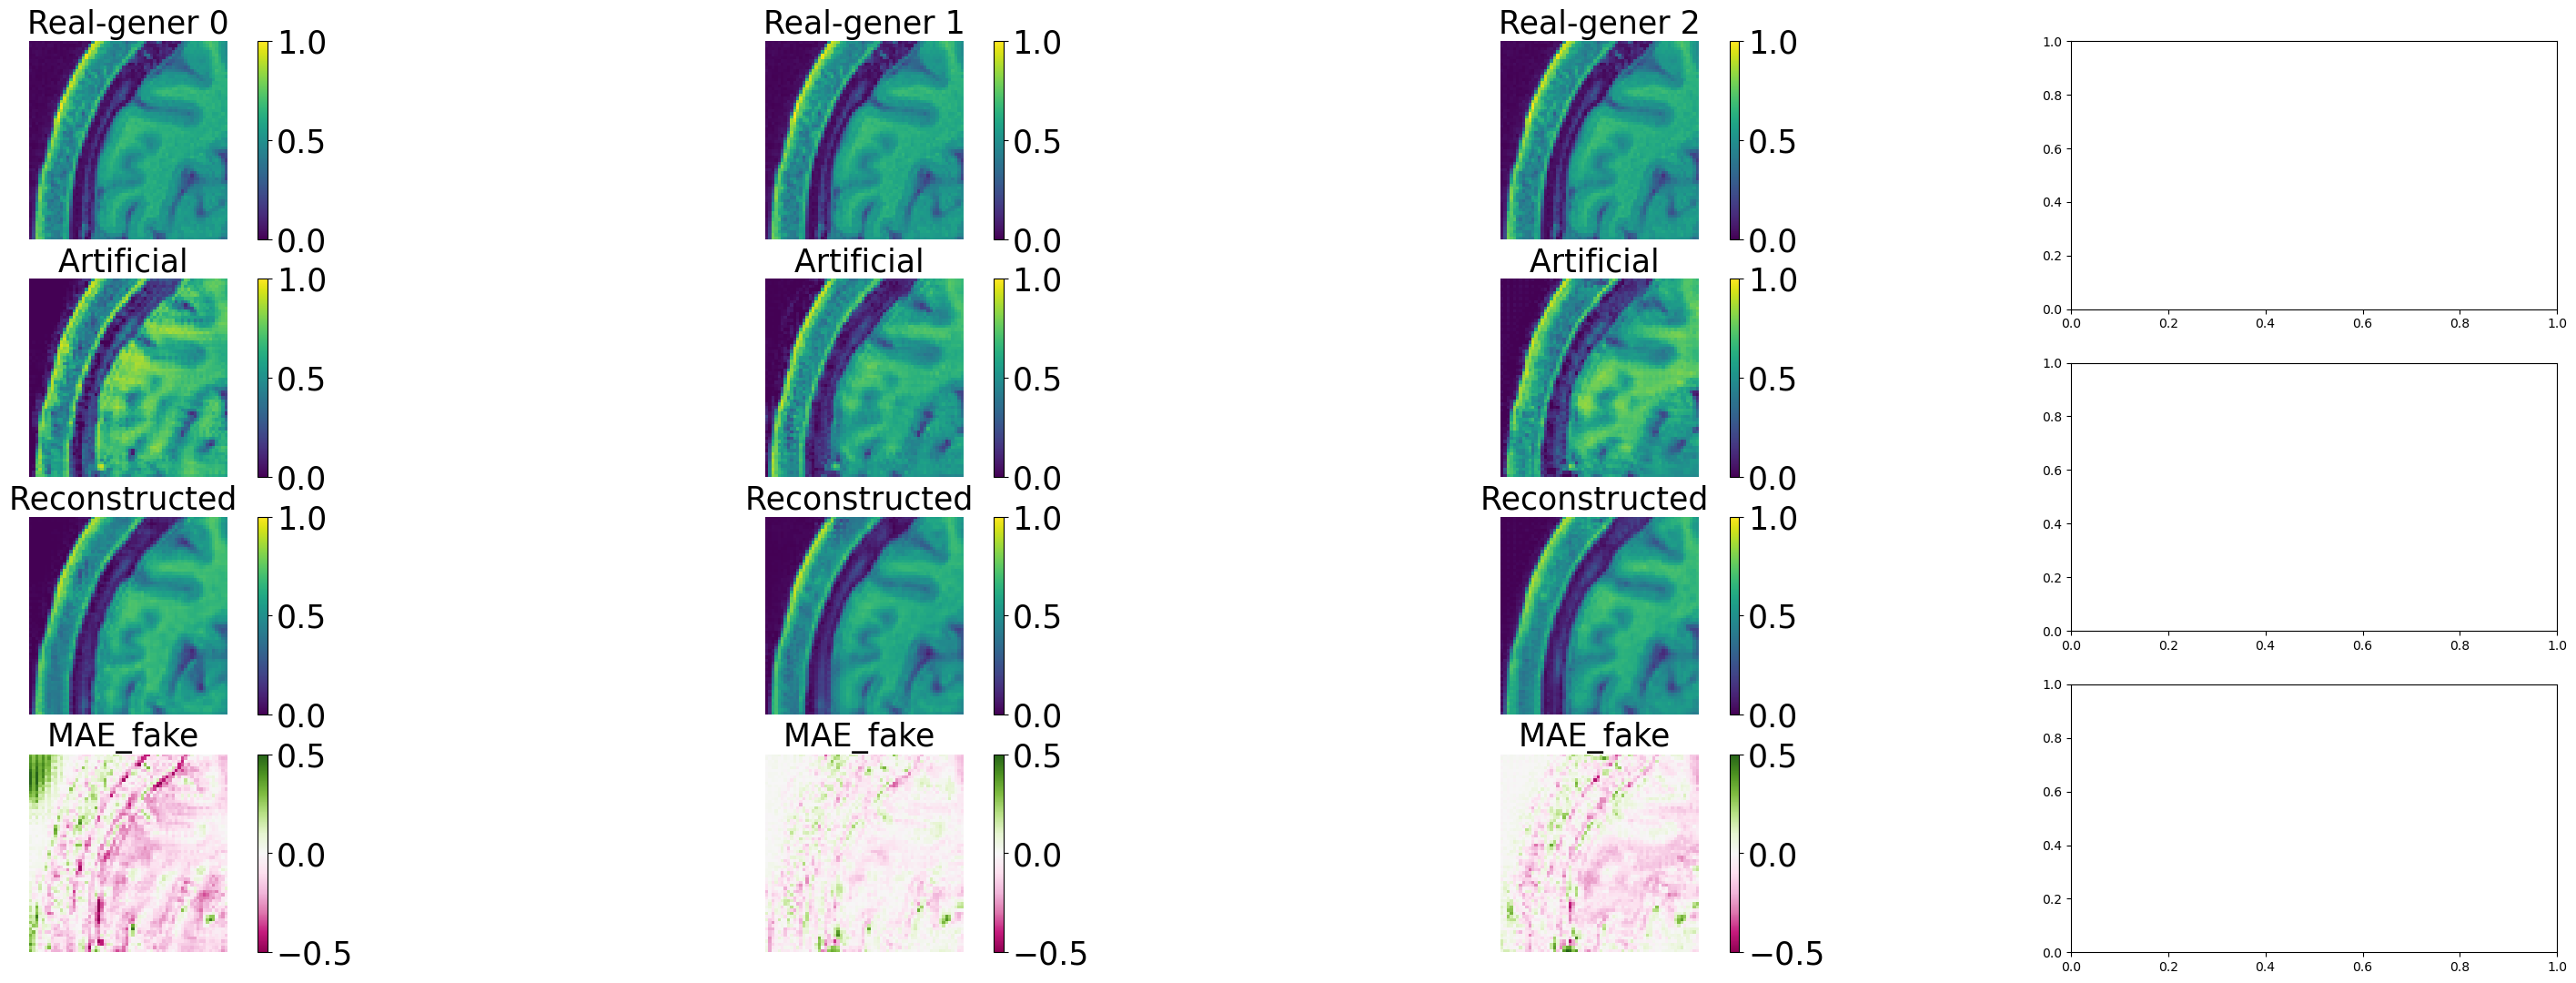

In [255]:
# plot real mri, fake mri, rec mri, MAE on real-fake, MAE on real-rec: each model on one column
plt.subplots(3,5, figsize=(40,13))
count = [0,1,2,4]
for i in range(1,4):
    plt.subplot(4,4,i)
    plt.imshow(test_mris[160]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real-gener '+str(count[i-1]), fontsize=25)
    plt.subplot(4,4,i+4)
    plt.imshow(test_fake_mris[count[i-1]][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial ', fontsize=25)
    plt.subplot(4,4,i+8)
    plt.imshow(test_rec_mris[count[i-1]][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Reconstructed ', fontsize=25)
    plt.subplot(4,4,i+12)
    plt.imshow(test_mris[160]-test_fake_mris[count[i-1]][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_fake ', fontsize=25)
 

Text(0.5, 1.0, 'Generator 4')

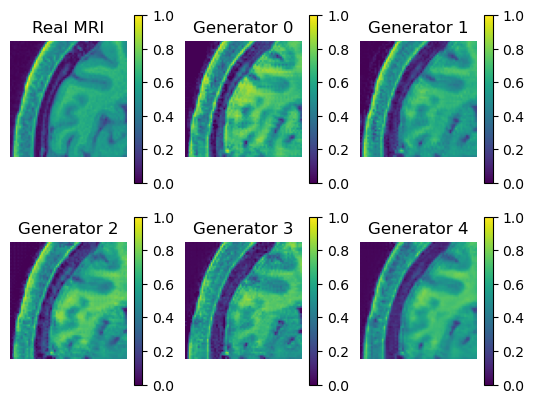

In [213]:
# real mri and fake mri generated with each model
plt.subplot(2,3,1)
plt.imshow(test_mris[160])  #test_mris[0][e.g 10:40,30:60]  for close-up on edges    
plt.clim(0,1);
plt.axis('off')
plt.colorbar()
plt.title('Real MRI')
plt.subplot(2,3,2)
plt.imshow(test_fake_mris[0][0,0,:,:]) #test_fake_mris[0][0,0,:,:][e.g 10:40,30:60]  for close-up on edges   
plt.clim(0,1);
plt.axis('off')
plt.colorbar()
plt.title('Generator 0')
plt.subplot(2,3,3)
plt.imshow(test_fake_mris[1][0,0,:,:])     
plt.clim(0,1);
plt.axis('off')
plt.colorbar()
plt.title('Generator 1')
plt.subplot(2,3,4)
plt.imshow(test_fake_mris[2][0,0,:,:])     
plt.clim(0,1);
plt.axis('off')
plt.colorbar()
plt.title('Generator 2')
plt.subplot(2,3,5)
plt.imshow(test_fake_mris[3][0,0,:,:])     
plt.clim(0,1);
plt.axis('off')
plt.colorbar()
plt.title('Generator 3')
plt.subplot(2,3,6)
plt.imshow(test_fake_mris[4][0,0,:,:])     
plt.clim(0,1);
plt.axis('off')
plt.colorbar()
plt.title('Generator 4')

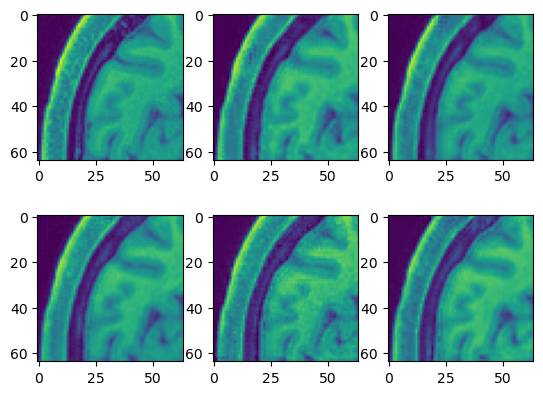

In [214]:
# real mri and rec mri generated with each model
plt.subplot(2,3,1)
plt.imshow(test_mris[160])    
plt.clim(0,1);
plt.subplot(2,3,2)
plt.imshow(test_rec_mris[0][0,0,:,:])     
plt.clim(0,1);
plt.subplot(2,3,3)
plt.imshow(test_rec_mris[1][0,0,:,:])     
plt.clim(0,1);
plt.subplot(2,3,4)
plt.imshow(test_rec_mris[2][0,0,:,:])     
plt.clim(0,1);
plt.subplot(2,3,5)
plt.imshow(test_rec_mris[3][0,0,:,:])     
plt.clim(0,1);
plt.subplot(2,3,6)
plt.imshow(test_rec_mris[4][0,0,:,:])     
plt.clim(0,1);

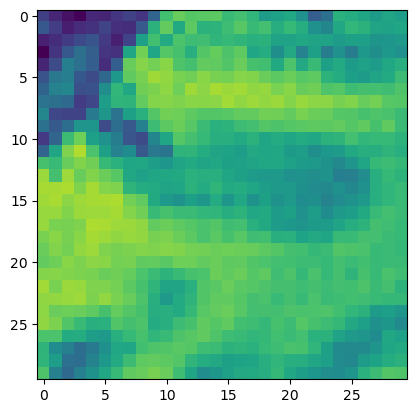

In [187]:
# close-ups
plt.imshow(test_fake_mris[0][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

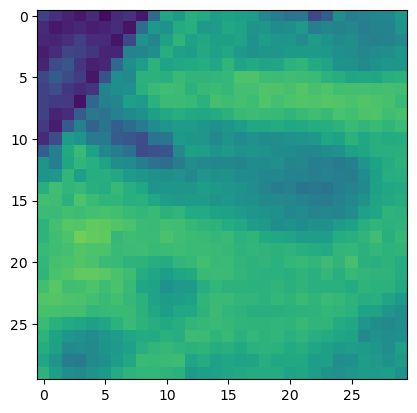

In [188]:
plt.imshow(test_fake_mris[1][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

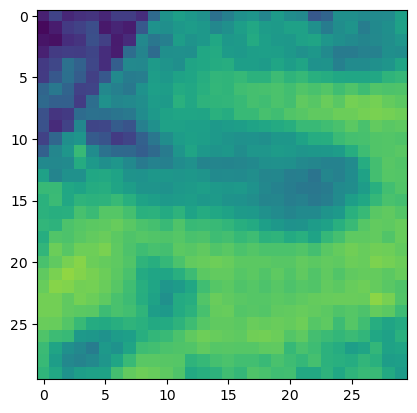

In [189]:
plt.imshow(test_fake_mris[2][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

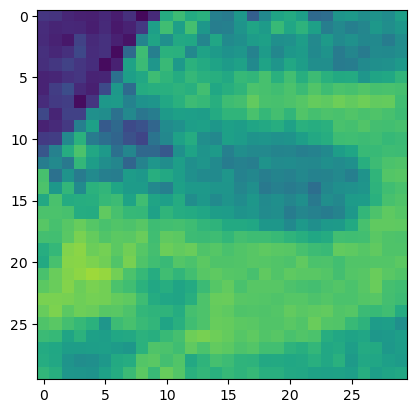

In [192]:
plt.imshow(test_fake_mris[3][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

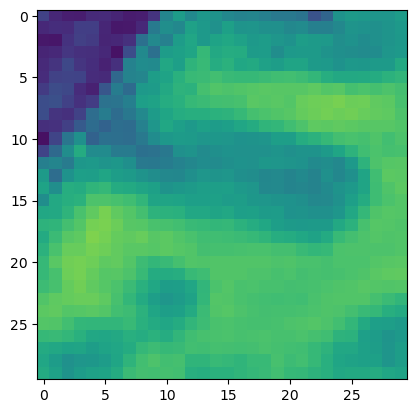

In [191]:
plt.imshow(test_fake_mris[4][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

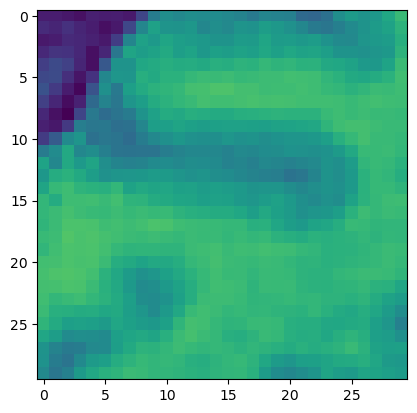

In [193]:
plt.imshow(test_rec_mris[0][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

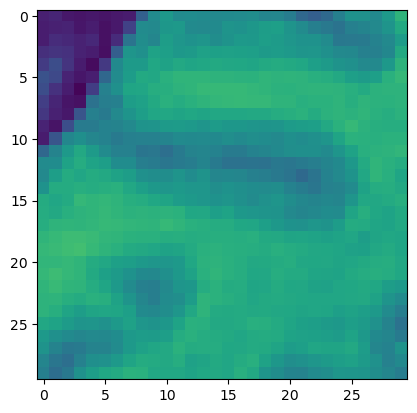

In [194]:
plt.imshow(test_rec_mris[1][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

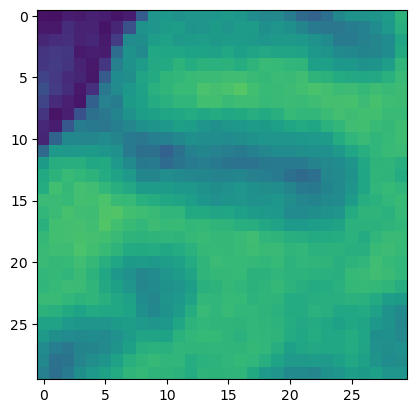

In [195]:
plt.imshow(test_rec_mris[2][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

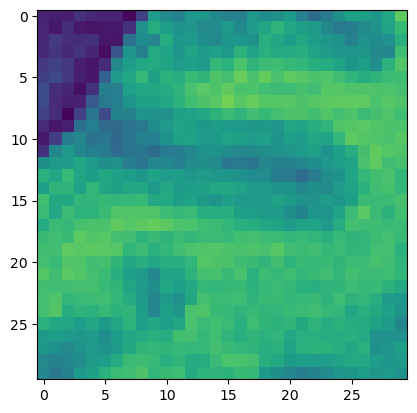

In [196]:
plt.imshow(test_rec_mris[3][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

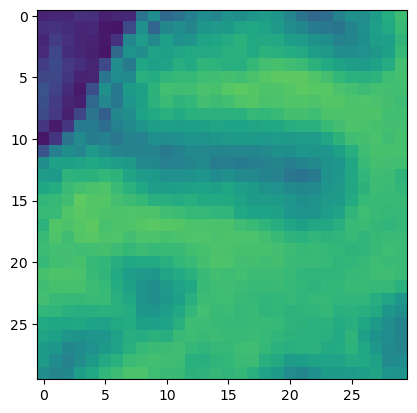

In [197]:
plt.imshow(test_rec_mris[4][0,0,:,:][10:40,30:60])     
plt.clim(0,1);

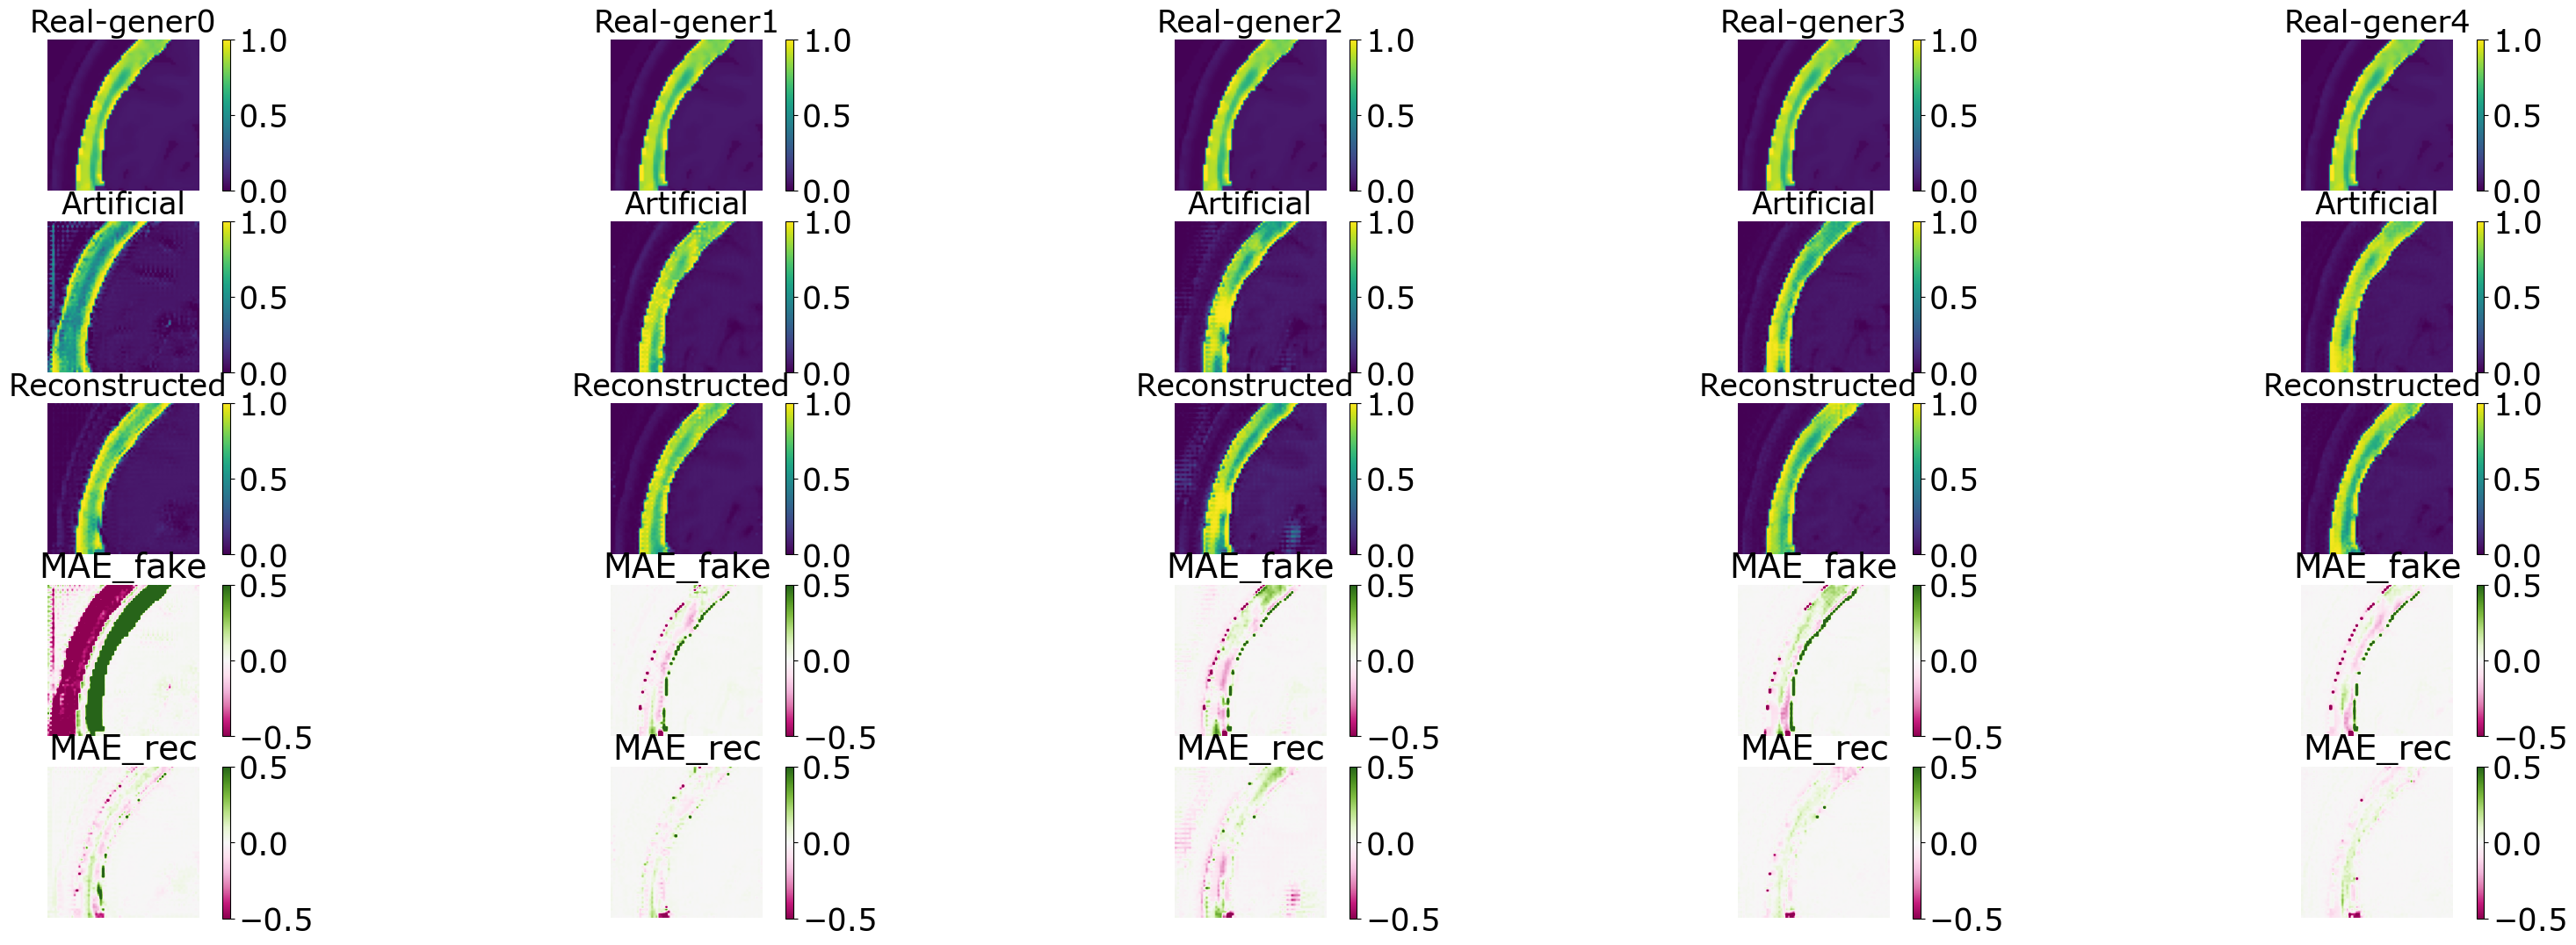

In [28]:
# plot real sos, fake sos, rec sos, MAE on real-fake, MAE on real-rec: each model on one column
plt.subplots(5,5, figsize=(40,13))
count = 0
for i in range(1,6):
    plt.subplot(5,5,i)
    plt.imshow(test_soss[160]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real-gener'+str(count), fontsize=25)
    plt.subplot(5,5,i+5)
    plt.imshow(test_fake_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial', fontsize=25)
    plt.subplot(5,5,i+10)
    plt.imshow(test_rec_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Reconstructed ', fontsize=25)
    plt.subplot(5,5,i+15)
    plt.imshow(test_soss[160]-test_fake_soss[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_fake', fontsize=28)
    plt.subplot(5,5,i+20)
    plt.imshow(test_soss[160]-test_rec_soss[count][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE_rec', fontsize=28)
    count +=1

In [ ]:
# close ups

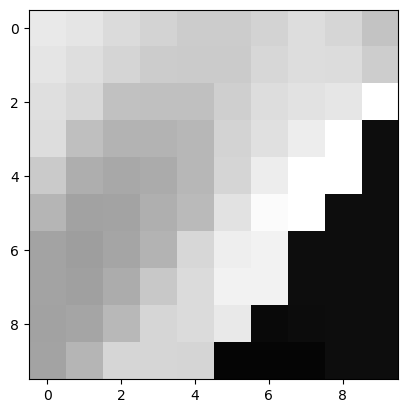

In [257]:
plt.imshow(test_soss[160][10:20,30:40],cmap="gray")    
plt.clim(0,1);

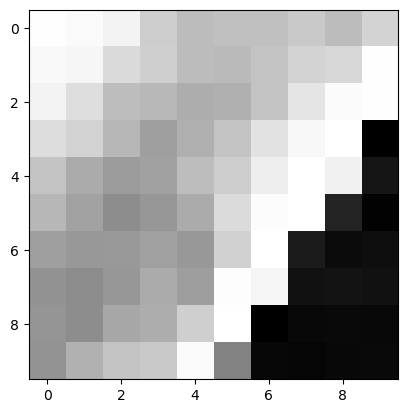

In [258]:
plt.imshow(test_rec_soss[0][0,0,:,:][10:20,30:40],cmap="gray")    
plt.clim(0,1);

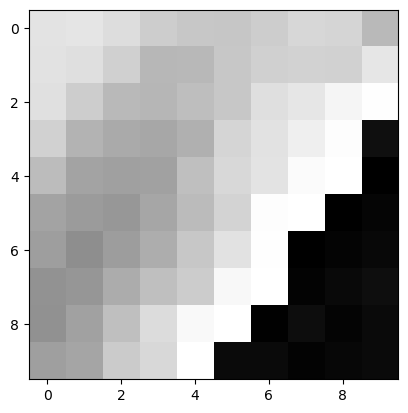

In [259]:
plt.imshow(test_rec_soss[1][0,0,:,:][10:20,30:40],cmap="gray")    
plt.clim(0,1);

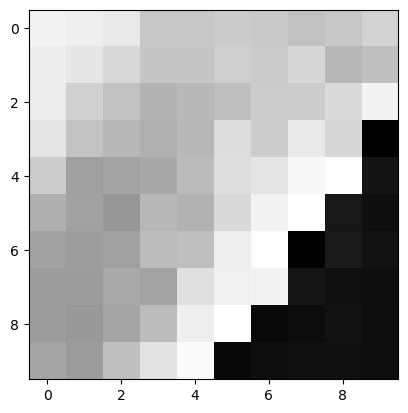

In [260]:
plt.imshow(test_rec_soss[2][0,0,:,:][10:20,30:40],cmap="gray")    
plt.clim(0,1);

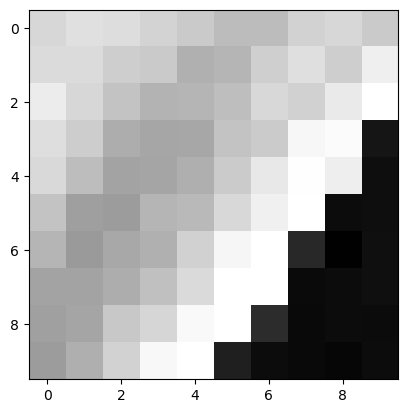

In [261]:
plt.imshow(test_rec_soss[3][0,0,:,:][10:20,30:40],cmap="gray")    
plt.clim(0,1);

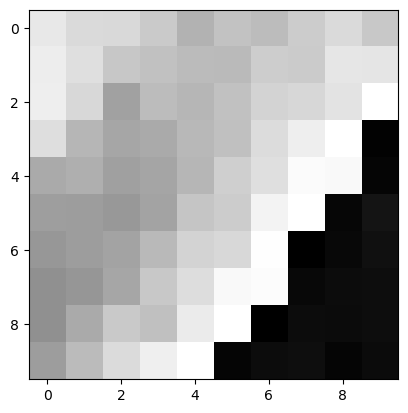

In [262]:
plt.imshow(test_rec_soss[4][0,0,:,:][10:20,30:40],cmap="gray")    
plt.clim(0,1);

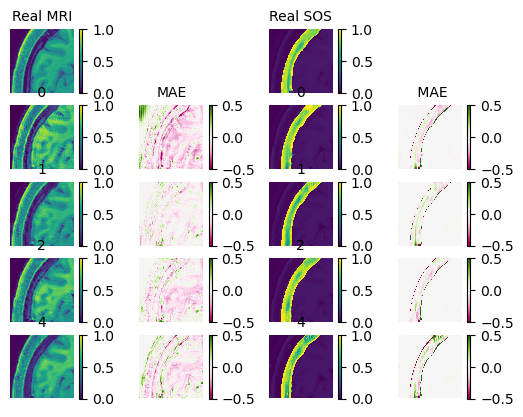

In [271]:
plt.subplot(5,4,1);plt.imshow(test_mris[160]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("Real MRI", fontsize=10)
plt.subplot(5,4,3);plt.imshow(test_soss[160]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("Real SOS", fontsize=10)
plt.subplot(5,4,5);plt.imshow(test_fake_mris[0][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title(" 0 ", fontsize=10)
plt.subplot(5,4,6);plt.imshow(test_mris[160]-test_fake_mris[0][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5);plt.title("MAE", fontsize=10)
plt.colorbar()
plt.subplot(5,4,7);plt.imshow(test_fake_soss[0][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("0", fontsize=10)
plt.subplot(5,4,8);plt.imshow(test_soss[160]-test_fake_soss[0][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5);plt.title(" MAE", fontsize=10)
plt.colorbar()
plt.subplot(5,4,9);plt.imshow(test_fake_mris[1][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("1", fontsize=10)
plt.subplot(5,4,10);plt.imshow(test_mris[160]-test_fake_mris[1][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
plt.colorbar()
plt.subplot(5,4,11);plt.imshow(test_fake_soss[1][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("1", fontsize=10)
plt.subplot(5,4,12);plt.imshow(test_soss[160]-test_fake_soss[1][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
plt.colorbar()
plt.subplot(5,4,13);plt.imshow(test_fake_mris[2][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("2", fontsize=10)
plt.subplot(5,4,14);plt.imshow(test_mris[160]-test_fake_mris[2][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
plt.colorbar()
plt.subplot(5,4,15);plt.imshow(test_fake_soss[2][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("2", fontsize=10)
plt.subplot(5,4,16);plt.imshow(test_soss[160]-test_fake_soss[2][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
plt.colorbar()
plt.subplot(5,4,17);plt.imshow(test_fake_mris[4][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("4", fontsize=10)
plt.subplot(5,4,18);plt.imshow(test_mris[160]-test_fake_mris[3][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
plt.colorbar()
plt.subplot(5,4,19);plt.imshow(test_fake_soss[4][0,0,:,:]); plt.clim(0,1);plt.colorbar();plt.axis("off");plt.title("4", fontsize=10)
plt.subplot(5,4,20);plt.imshow(test_soss[160]-test_fake_soss[4][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
plt.colorbar()

In [ ]:
# other tests and plots

0.53333336
0.003921569


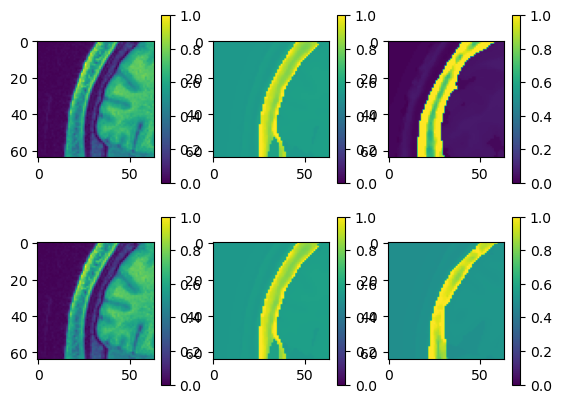

In [52]:
og_mri =plt.imread('validation/A/mri_img10.png')
og_sos =plt.imread('validation/B/sos_img10.png')
og_sos2 = plt.imread('validation/B/sos_img509.png')
plt.subplot(2,3,1);plt.imshow(og_mri); plt.colorbar();plt.clim(0,1) 
plt.subplot(2,3,2);plt.imshow(og_sos);plt.colorbar(); plt.clim(0,1) 
plt.subplot(2,3,3);plt.imshow(og_sos2);plt.colorbar(); plt.clim(0,1) 
plt.subplot(2,3,4);plt.imshow(test_mris[0][0,0,:,:]); plt.colorbar(); plt.clim(0,1) 
plt.subplot(2,3,5);plt.imshow(test_soss[0][0,0,:,:]);plt.colorbar(); plt.clim(0,1) 
plt.subplot(2,3,6);plt.imshow(test_soss[400][0,0,:,:]);plt.colorbar(); plt.clim(0,1) 


print(test_soss[0][0,0,:,:][60,5])
print(test_mris[0][0,0,:,:][60,5])

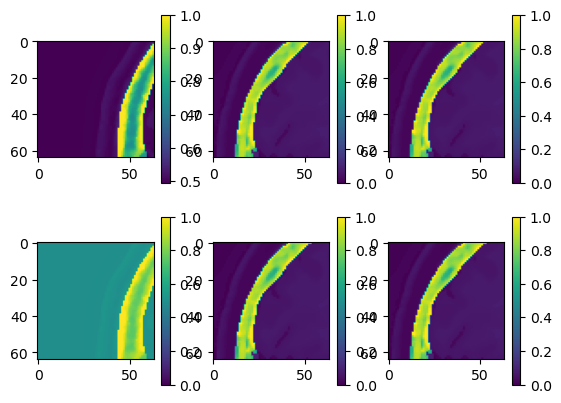

In [65]:
og_sos =plt.imread('validation/B/sos_img159.png')
og_sos2 = plt.imread('validation/B/sos_img160.png')
og_sos_normalized = (og_sos2 - np.min(og_sos2)) / (np.max(og_sos2) - np.min(og_sos2))
plt.subplot(2,3,1);plt.imshow(og_sos); plt.colorbar();
plt.subplot(2,3,2);plt.imshow(og_sos2);plt.colorbar();
plt.subplot(2,3,3);plt.imshow(og_sos_normalized);plt.colorbar(); 
plt.subplot(2,3,4);plt.imshow(og_sos); plt.colorbar(); plt.clim(0,1) 
plt.subplot(2,3,5);plt.imshow(og_sos2);plt.colorbar(); plt.clim(0,1) 
plt.subplot(2,3,6);plt.imshow(og_sos_normalized);plt.colorbar(); plt.clim(0,1) 

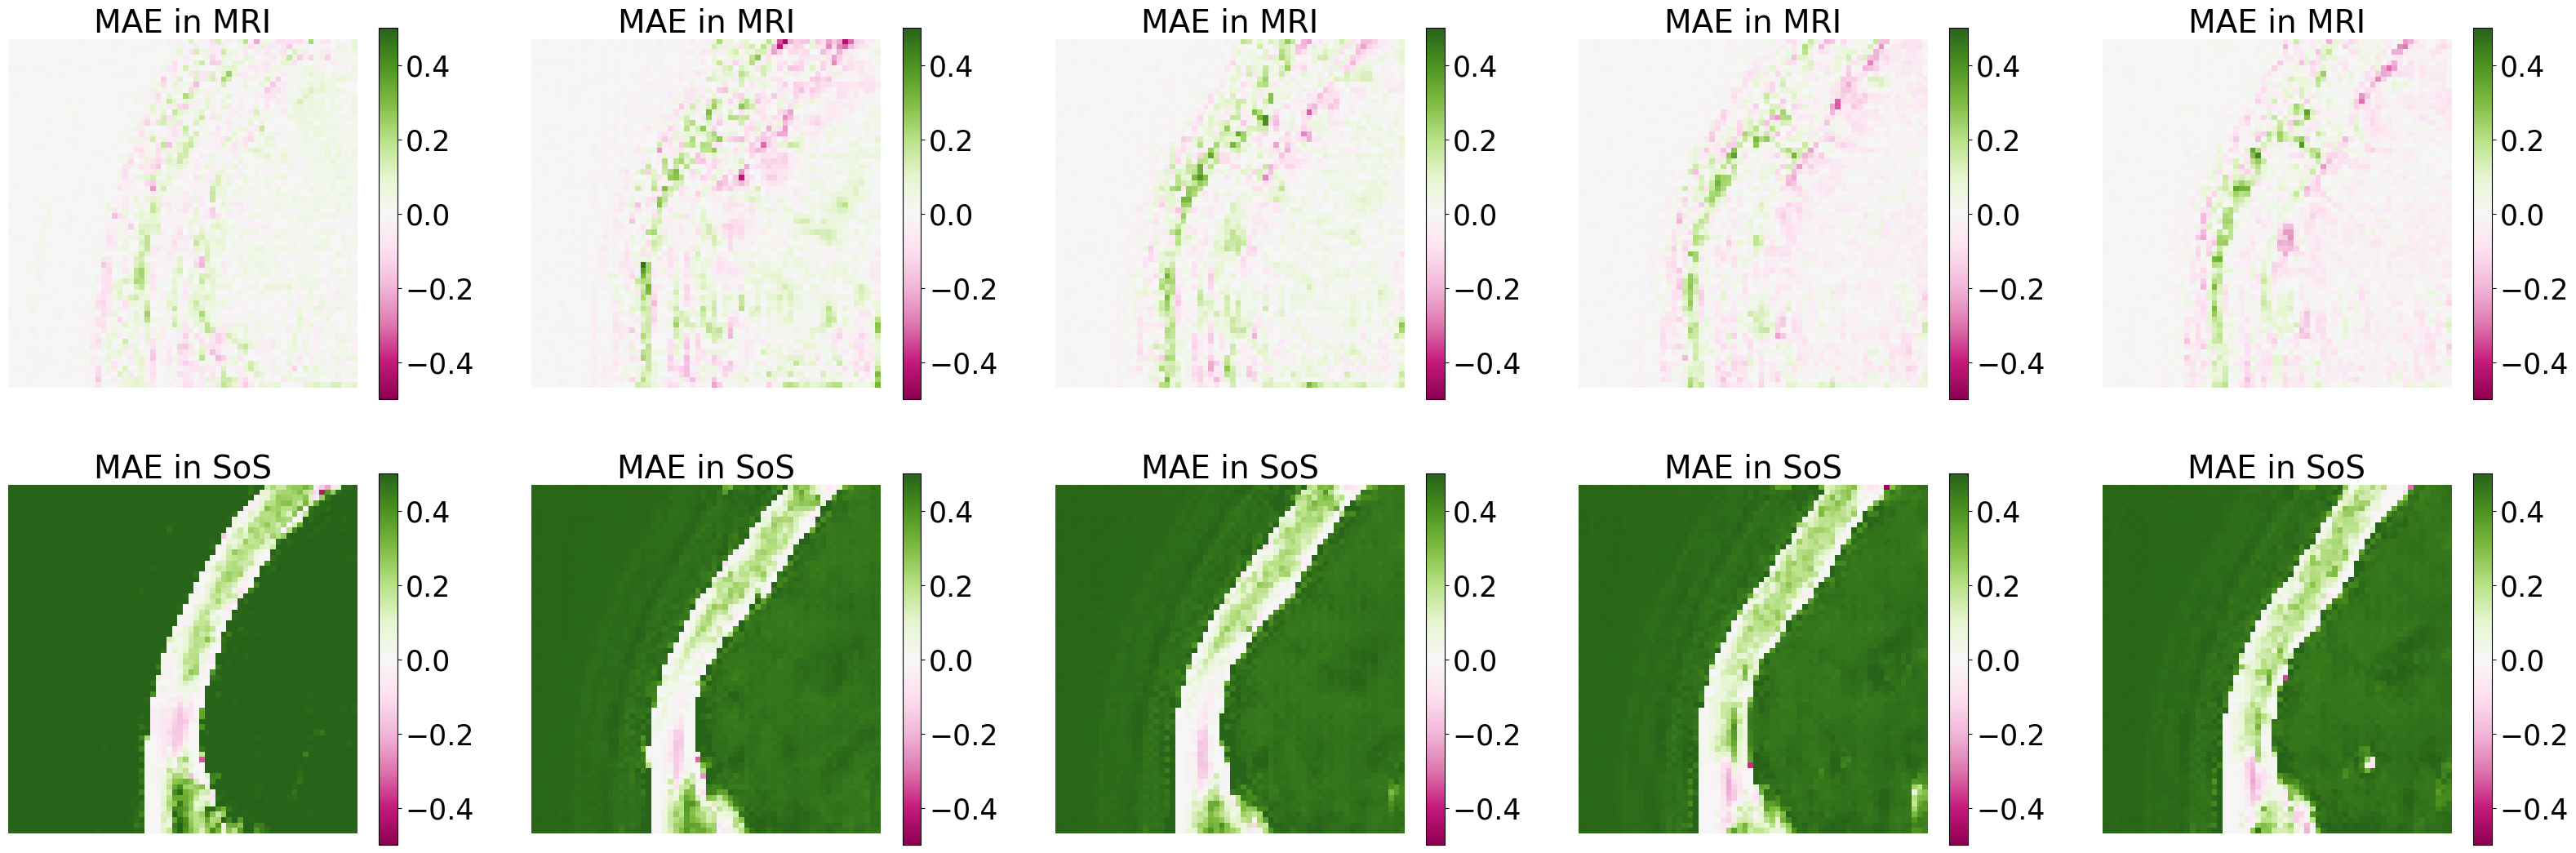

In [54]:
plt.subplots(2,5,figsize=(40,13))
for i in range(1,6):
    plt.subplot(2,5,i)
    plt.imshow(test_mris[i-1][0,0,:,:]-test_rec_mris[i-1][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE in MRI', fontsize=28)
    plt.subplot(2,5,i+5)
    plt.imshow(test_soss[i-1][0,0,:,:]-test_rec_soss[i-1][0,0,:,:], cmap='PiYG'); plt.axis('off'); plt.clim(-0.5,0.5)
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.title('MAE in SoS', fontsize=28)

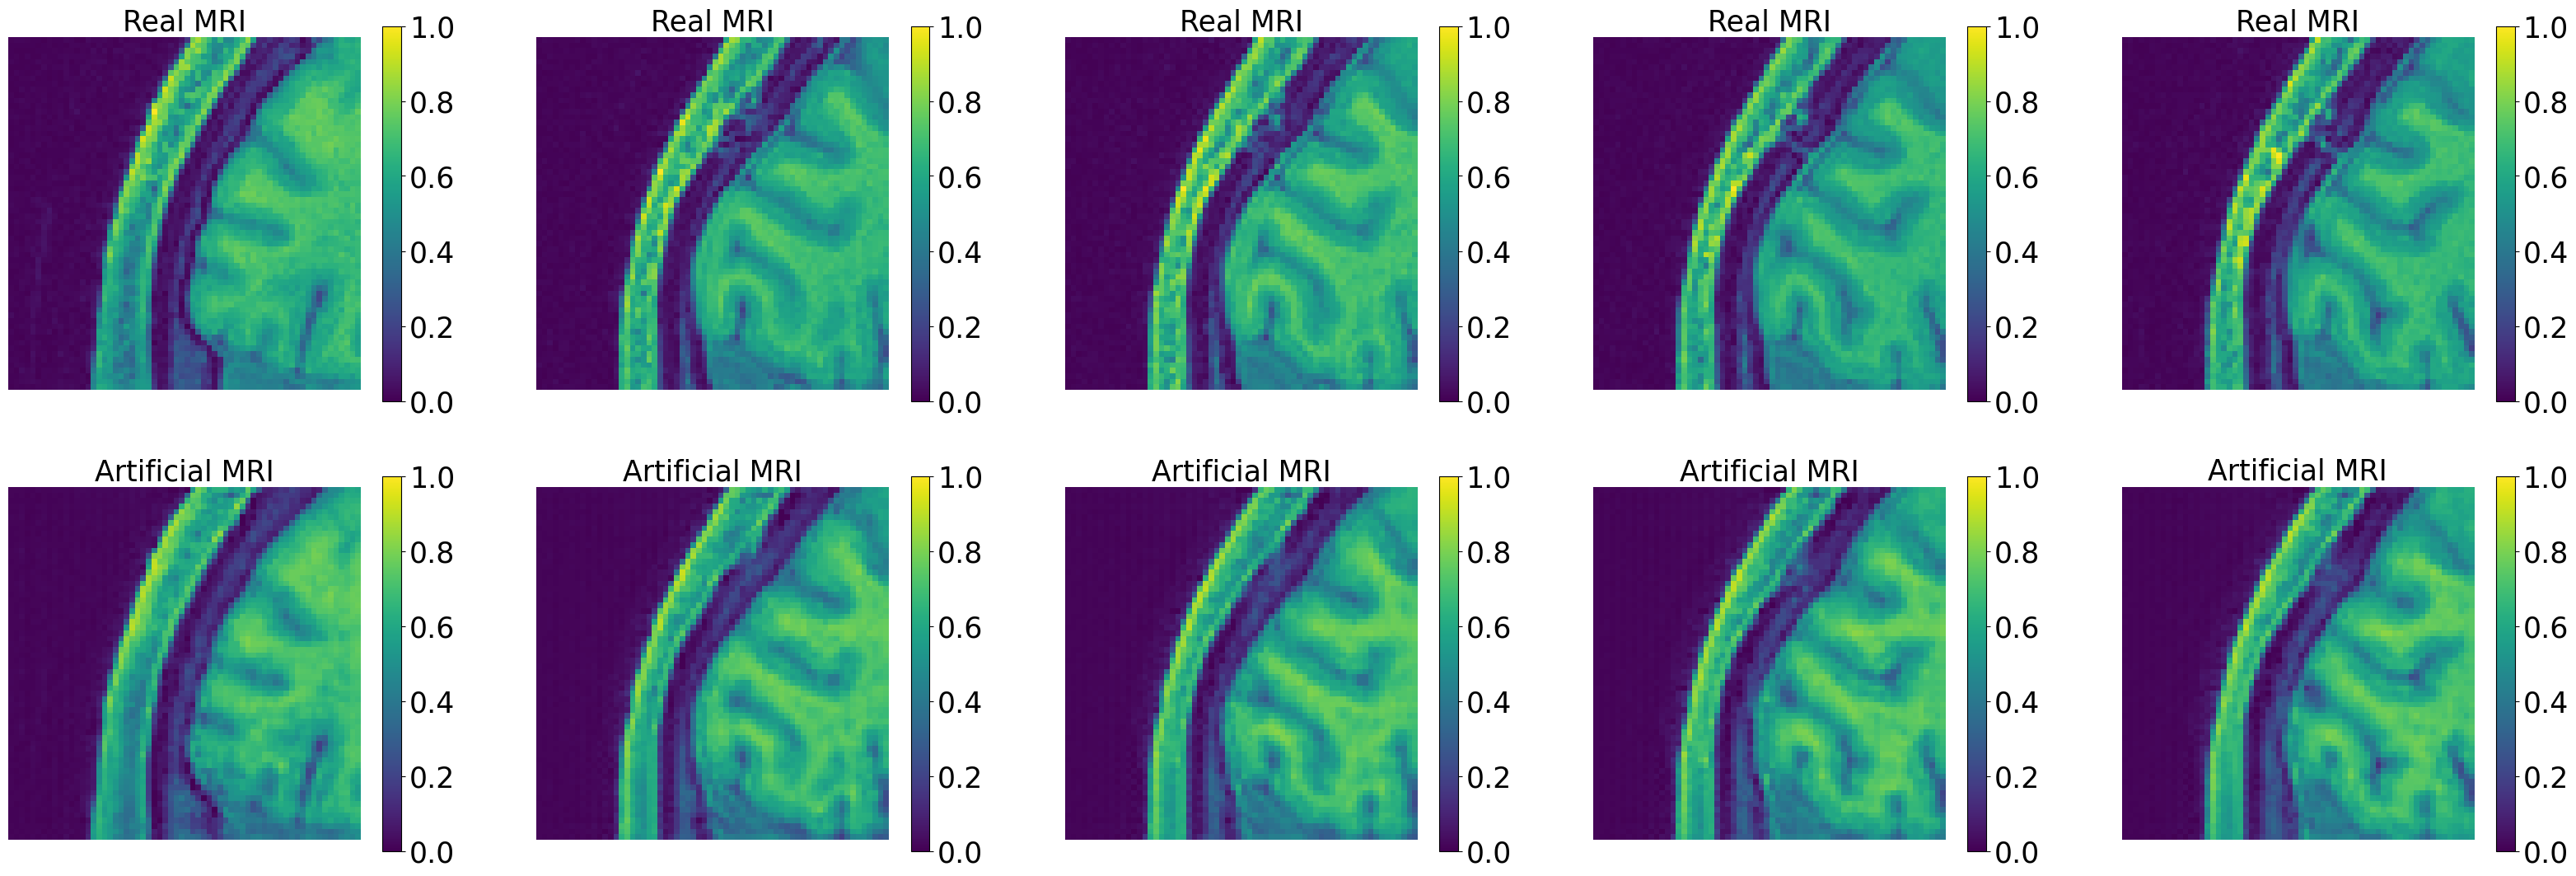

In [59]:

plt.subplots(2,5, figsize=(40,13))
count = 0
for i in range(1,6):
    plt.subplot(2,5,i)
    plt.imshow(test_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real MRI', fontsize=25)
    plt.subplot(2,5,i+5)
    plt.imshow(test_rec_mris[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial MRI', fontsize=25)
    count +=1

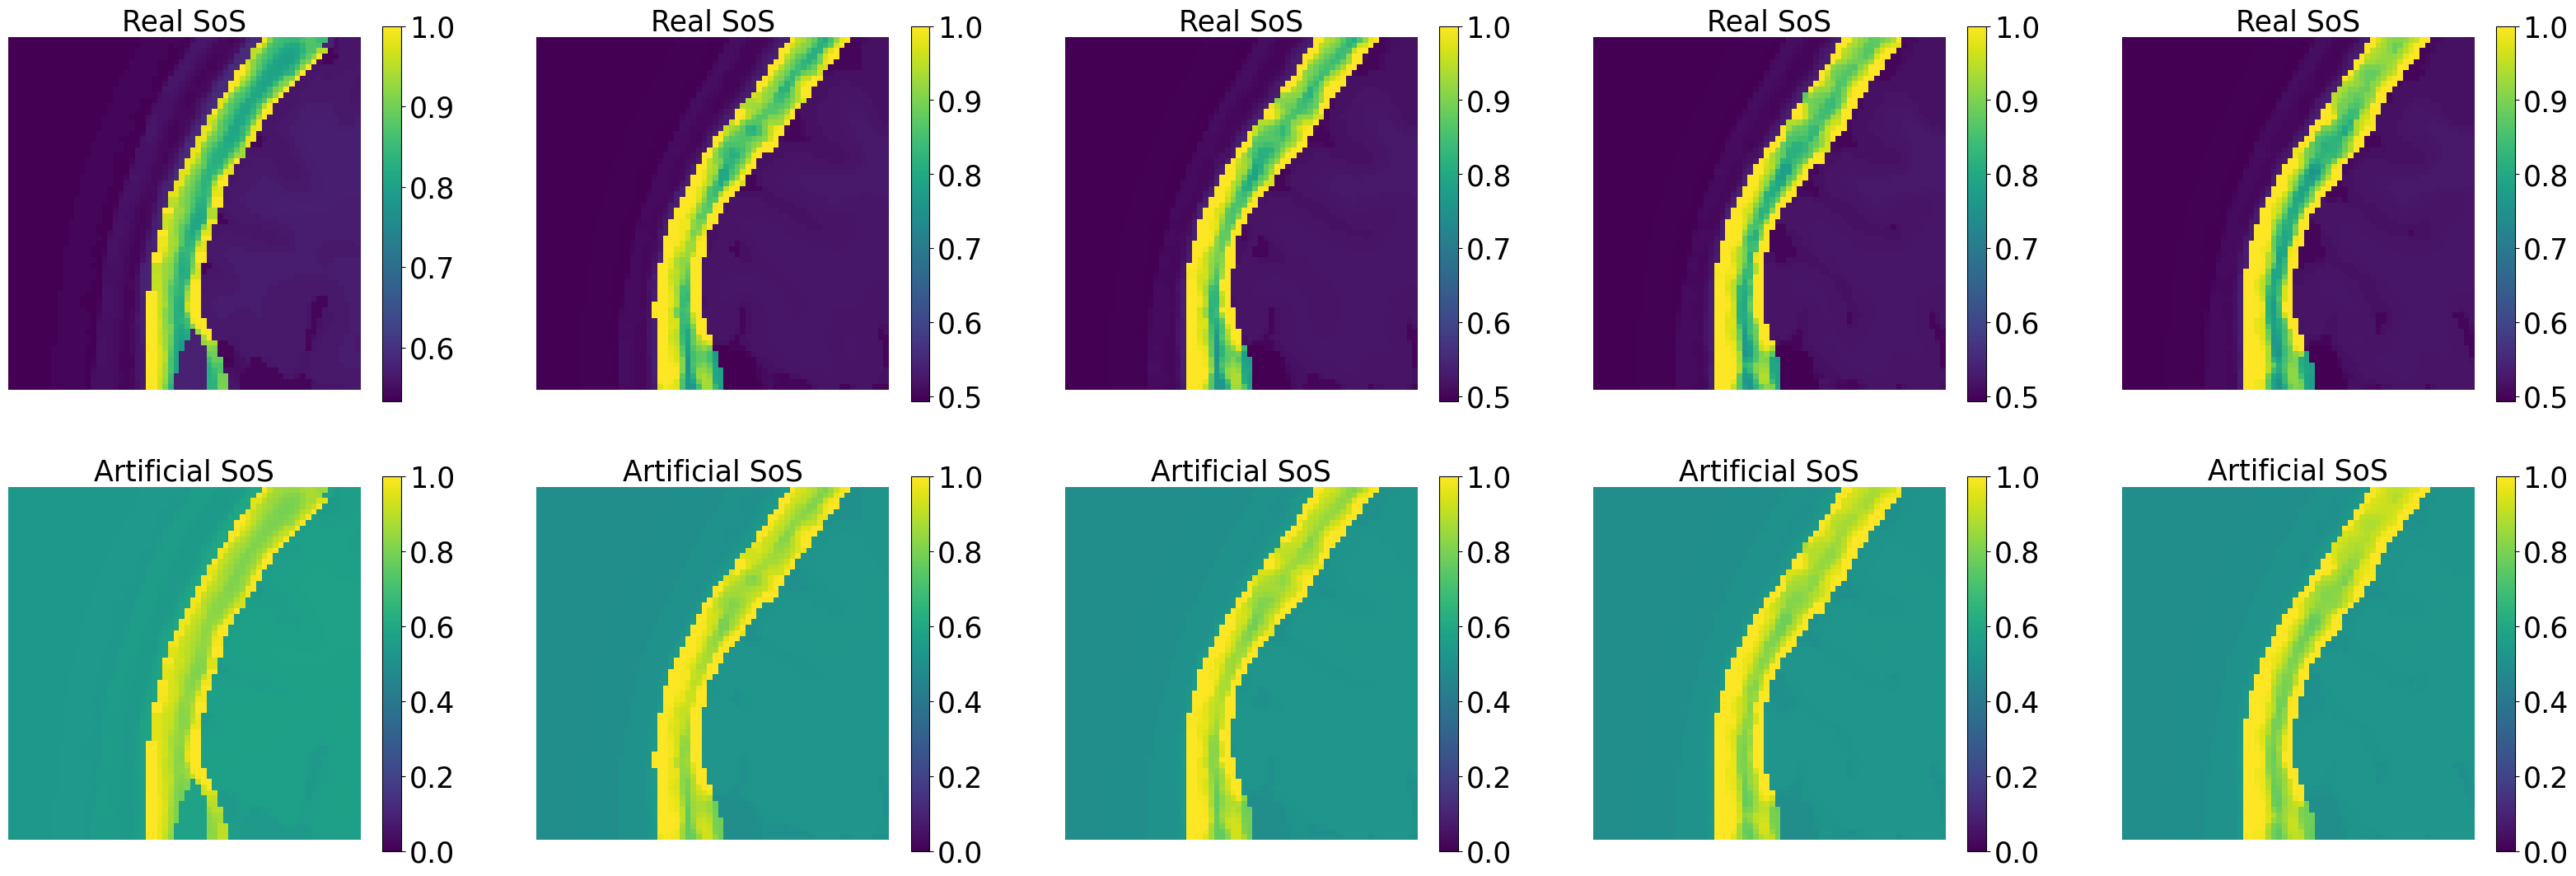

In [26]:
plt.subplots(2,5, figsize=(40,13))
count = 0
for i in range(1,6):
    plt.subplot(2,5,i)
    plt.imshow(test_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0, 1);
    plt.title('Real SoS', fontsize=25)
    plt.subplot(2,5,i+5)
    plt.imshow(test_rec_soss[count][0,0,:,:]);plt.axis('off')
    plt.colorbar().ax.tick_params(labelsize=25)
    plt.clim(0,1);
    plt.title('Artificial SoS', fontsize=25)
    count +=1

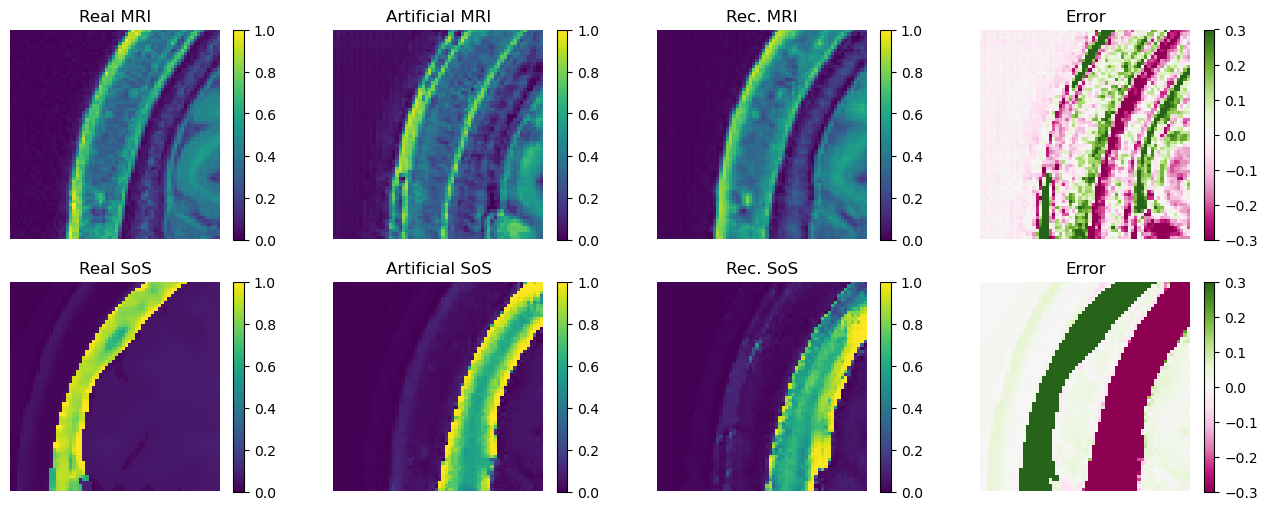

In [62]:
real_sos=plt.imread('validation/B/sos_img160.png')
n=3
plt.subplots(2,4,figsize=(16,6));
plt.subplot(2,4,1);plt.imshow(test_mris[150][0,0,:,:]); plt.title('Real MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,2);plt.imshow(test_fake_mris[150][0,0,:,:]); plt.title('Artificial MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,3);plt.imshow(test_rec_mris[150][0,0,:,:]); plt.title('Rec. MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,4);plt.imshow(test_mris[150][0,0,:,:]-test_fake_mris[150][0,0,:,:], cmap='PiYG');plt.colorbar();plt.title('Error'); plt.clim(-0.3,0.3); plt.axis('off')
plt.subplot(2,4,5);plt.imshow(real_sos); plt.title('Real SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,6);plt.imshow(test_fake_soss[150][0,0,:,:]); plt.title('Artificial SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,7);plt.imshow(test_rec_soss[150][0,0,:,:]); plt.title('Rec. SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
plt.subplot(2,4,8);plt.imshow(real_sos-test_fake_soss[150][0,0,:,:], cmap='PiYG');plt.colorbar();plt.title('Error'); plt.clim(-0.3,0.3); plt.axis('off')
plt.show()

In [72]:
mri_mses = []
sos_mses = []
for i in range(len(test_mris)):
    mri_mses.append(mse(test_mris[i][0,0,:,:], test_fake_mris[i][0,0,:,:]))
    sos_mses.append(mse(test_soss[i][0,0,:,:], test_fake_soss[i][0,0,:,:]))

rec_mri_mses = []
rec_sos_mses = []
for i in range(len(test_mris)):
    mri_mses.append(mse(test_mris[i][0,0,:,:], test_rec_mris[i][0,0,:,:]))
    sos_mses.append(mse(test_soss[i][0,0,:,:], test_rec_soss[i][0,0,:,:]))


    
mri_ssim = []
sos_ssim = []
rec_mri_ssim = []
rec_sos_ssim = []
for i in range(len(test_mris)):
    mri_ssim.append(ssim(test_mris[i][0,0,:,:], test_fake_mris[i][0,0,:,:]))
    sos_ssim.append(ssim(test_soss[i][0,0,:,:], test_fake_soss[i][0,0,:,:]))
    rec_mri_ssim.append(ssim(test_mris[i][0,0,:,:], test_rec_mris[i][0,0,:,:]))
    rec_sos_ssim.append(ssim(test_soss[i][0,0,:,:], test_rec_soss[i][0,0,:,:]))



mri_psnr = []
sos_psnr = []
rec_mri_psnr = []
rec_sos_psnr = []
for i in range(len(test_mris)):
    mri_psnr.append(PSNR(test_mris[i][0,0,:,:], test_fake_mris[i][0,0,:,:]))
    sos_psnr.append(PSNR(test_soss[i][0,0,:,:], test_fake_soss[i][0,0,:,:]))
    rec_mri_psnr.append(PSNR(test_mris[i][0,0,:,:], test_rec_mris[i][0,0,:,:]))
    rec_sos_psnr.append(PSNR(test_soss[i][0,0,:,:], test_rec_soss[i][0,0,:,:]))


mri_mae = []
sos_mae = []
rec_mri_mae = []
rec_sos_mae = []
for i in range(len(test_mris)):
    mri_mae.append(metrics.mean_absolute_error(test_mris[i][0,0,:,:], test_fake_mris[i][0,0,:,:]))
    sos_mae.append(metrics.mean_absolute_error(test_soss[i][0,0,:,:], test_fake_soss[i][0,0,:,:]))
    rec_mri_mae.append(metrics.mean_absolute_error(test_mris[i][0,0,:,:], test_rec_mris[i][0,0,:,:]))
    rec_sos_mae.append(metrics.mean_absolute_error(test_soss[i][0,0,:,:], test_rec_soss[i][0,0,:,:]))

In [74]:
print("Evaluation Metrics")
print("Recons.................")
print("MAE: \t MRI: "+str(np.mean(rec_mri_mae)))
print("\t SoS: "+str(np.mean(rec_sos_mae)))
#print("MSE: \t MRI: "+str(np.mean(rec_mri_mses)))
# print("\t SoS: "+str(np.mean(rec_sos_mses)))
print("PSNR: \t MRI: "+str(np.mean(rec_mri_psnr)))
print("\t SoS: "+str(np.mean(rec_sos_psnr)))
print("SSIM: \t MRI: "+str(np.mean(rec_mri_ssim)))
print("\t SoS: "+str(np.mean(rec_sos_ssim)))
print("Fakes..................")
print("MAE: \t MRI: "+str(np.mean(mri_mae)))
print("\t SoS: "+str(np.mean(sos_mae)))
print("MSE: \t MRI: "+str(np.mean(mri_mses)))
print("\t SoS: "+str(np.mean(sos_mses)))
print("PSNR: \t MRI: "+str(np.mean(mri_psnr)))
print("\t SoS: "+str(np.mean(sos_psnr)))
print("SSIM: \t MRI: "+str(np.mean(mri_ssim)))
print("\t SoS: "+str(np.mean(sos_ssim)))

Evaluation Metrics
Recons.................
MAE: 	 MRI: 0.04232592
	 SoS: 0.17022221
PSNR: 	 MRI: 72.62634434190565
	 SoS: 65.96427604937115
SSIM: 	 MRI: 0.9186349292331045
	 SoS: 0.7075338424609257
Fakes..................
MAE: 	 MRI: 0.07741061
	 SoS: 0.18798238
MSE: 	 MRI: 0.009246939171988502
	 SoS: 0.08314219942304206
PSNR: 	 MRI: 66.92615341557463
	 SoS: 61.19285434549277
SSIM: 	 MRI: 0.7160424723432222
	 SoS: 0.603853535800471


In [68]:
print("Fakes Std.Dev..................")
print("MAE: \t MRI: "+str(np.std(mri_mae)))
print("\t SoS: "+str(np.std(sos_mae)))
print("MSE: \t MRI: "+str(np.std(mri_mses)))
print("\t SoS: "+str(np.std(sos_mses)))
print("PSNR: \t MRI: "+str(np.std(mri_psnr)))
print("\t SoS: "+str(np.std(sos_psnr)))
print("SSIM: \t MRI: "+str(np.std(mri_ssim)))
print("\t SoS: "+str(np.std(sos_ssim)))

Fakes Std.Dev..................
MAE: 	 MRI: 0.019918678
	 SoS: 0.1792684
MSE: 	 MRI: 0.009734881663937362
	 SoS: 0.08802085089268534
PSNR: 	 MRI: 1.4872569471939283
	 SoS: 4.930144107477119
SSIM: 	 MRI: 0.09284952004296669
	 SoS: 0.28616711324917904


In [70]:
print("Recons Std.Dev..................")
print("MAE: \t MRI: "+str(np.std(rec_mri_mae)))
print("\t SoS: "+str(np.std(rec_sos_mae)))
print("PSNR: \t MRI: "+str(np.std(rec_mri_psnr)))
print("\t SoS: "+str(np.std(rec_sos_psnr)))
print("SSIM: \t MRI: "+str(np.std(rec_mri_ssim)))
print("\t SoS: "+str(np.std(rec_sos_ssim)))

Recons Std.Dev..................
MAE: 	 MRI: 0.013380648
	 SoS: 0.18978179
PSNR: 	 MRI: 2.157560916451852
	 SoS: 8.393327106230965
SSIM: 	 MRI: 0.041929057140816746
	 SoS: 0.32171400823617186


In [ ]:
# to display images 
name = ["4resnet50","4resnet60","4resnet70","4resnet90","4resnet51","4resnet61","4resnet71","4resnet91","4resnet52","4resnet62","4resnet72","4resnet92","4resnet53","4resnet63","4resnet73","4resnet93"]
for s in range(len(name)):
    test_fake_mris = []
    test_fake_soss = []
    test_rec_mris = []
    test_rec_soss = []
    G_A2B, G_B2A, D_A, D_B=load_models(name[s])
    G_A2B.to(device)
    G_B2A.to(device)
    D_A.to(device)
    D_B.to(device)
    for i in range(len(test_mris)):
        real_mri = torch.Tensor(test_mris[i]).unsqueeze(0).unsqueeze(0)
        fake_sos = G_A2B(real_mri.to(device)).cpu().detach().numpy()
        rec_mri = G_B2A(torch.Tensor(fake_sos).to(device)).cpu().detach().numpy()

        real_sos = torch.Tensor(test_soss[i]).unsqueeze(0).unsqueeze(0)
        fake_mri = G_B2A(real_sos.to(device)).cpu().detach().numpy()
        rec_sos = G_A2B(torch.Tensor(fake_mri).to(device)).cpu().detach().numpy()

        test_fake_mris.append(fake_mri)
        test_fake_soss.append(fake_sos)
        test_rec_mris.append(rec_mri)
        test_rec_soss.append(rec_sos)

        with torch.no_grad():
            real_mri.detach().cpu()
            real_sos.detach().cpu()
    n=3
    print(name[s])
    plt.subplots(2,4,figsize=(16,6));
    plt.subplot(2,4,1);plt.imshow(test_mris[n]); plt.title('Real MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
    plt.subplot(2,4,2);plt.imshow(test_fake_mris[n][0,0,:,:]); plt.title('Artificial MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
    plt.subplot(2,4,3);plt.imshow(test_rec_mris[n][0,0,:,:]); plt.title('Rec. MRI'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
    plt.subplot(2,4,4);plt.imshow(test_mris[n]-test_fake_mris[n][0,0,:,:], cmap='PiYG');plt.colorbar();plt.title('Error'); plt.clim(-0.3,0.3); plt.axis('off')
    plt.subplot(2,4,5);plt.imshow(test_soss[n]); plt.title('Real SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
    plt.subplot(2,4,6);plt.imshow(test_fake_soss[n][0,0,:,:]); plt.title('Artificial SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
    plt.subplot(2,4,7);plt.imshow(test_rec_soss[n][0,0,:,:]); plt.title('Rec. SoS'); plt.colorbar(); plt.clim(0,1); plt.axis('off')
    plt.subplot(2,4,8);plt.imshow(test_soss[n]-test_fake_soss[n][0,0,:,:], cmap='PiYG');plt.colorbar();plt.title('Error'); plt.clim(-0.3,0.3); plt.axis('off')
    plt.show()

